## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

## Importing Boston Listing dataset

In [3]:
location = 'boston'

In [4]:
listing_df = pd.read_csv('./datasets/{}/listings.csv'.format(location))

In [6]:
listing_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


## Exploring dataset

### Unique values, identifying existing data types, checking for nulls

In [13]:
# checking for unique values in each column
n = listing_df.nunique( axis = 0 )

In [17]:
n.head(20)

id                       3585
listing_url              3585
scrape_id                   1
last_scraped                1
name                     3504
summary                  3113
space                    2268
description              3423
experiences_offered         1
neighborhood_overview    1728
notes                    1269
transit                  1859
access                   1762
interaction              1617
house_rules              1928
thumbnail_url            2986
medium_url               2986
picture_url              3585
xl_picture_url           2986
host_id                  2181
dtype: int64

In [18]:
# checking for categorical vs numerical columns and exploring separately
cat_df = listing_df.select_dtypes(include = ['category', 'object'])

In [25]:
cat_df.columns[cat_df.isnull().sum()/cat_df.shape[0]>0.7]

Index(['weekly_price', 'monthly_price'], dtype='object')

In [39]:
cat_df['monthly_price'].isnull().sum()

2697

In [30]:
cat_df['monthly_price']

0             NaN
1             NaN
2       $1,350.00
3             NaN
4             NaN
          ...    
3580          NaN
3581          NaN
3582          NaN
3583          NaN
3584          NaN
Name: monthly_price, Length: 3585, dtype: object

In [27]:
num_df = listing_df._get_numeric_data()

In [29]:
num_df.columns[num_df.isnull().sum()/num_df.shape[0]>0.7]

Index(['neighbourhood_group_cleansed', 'square_feet', 'has_availability',
       'license', 'jurisdiction_names'],
      dtype='object')

### price columns are specified as object! - needs to change and few columns have more than 70% of their values as null - so remove those - lets check it through the info() function

In [44]:
print(listing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

### removing the columns that have all values as null

In [5]:
cleaned_listing_df = listing_df.dropna(how = 'all', axis = 1)

In [6]:
cleaned_listing_df.shape

(3585, 91)

### removing all columns that have 70% or more of their values as null

In [7]:
clean_col = cleaned_listing_df.columns[cleaned_listing_df.isnull().sum()/listing_df.shape[0] < 0.7]

In [8]:
cleaned_listing_df1 = cleaned_listing_df[clean_col]

In [9]:
cleaned_listing_df1.shape

(3585, 88)

In [58]:
cleaned_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

### selecting only the ones that are object

In [75]:
cleaned_listing_df1.select_dtypes(include = ['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   listing_url                       3585 non-null   object
 1   last_scraped                      3585 non-null   object
 2   name                              3585 non-null   object
 3   summary                           3442 non-null   object
 4   space                             2528 non-null   object
 5   description                       3585 non-null   object
 6   experiences_offered               3585 non-null   object
 7   neighborhood_overview             2170 non-null   object
 8   notes                             1610 non-null   object
 9   transit                           2295 non-null   object
 10  access                            2096 non-null   object
 11  interaction                       2031 non-null   object
 12  house_rules         

### these should be numeric (int) type fields - convert these! 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',  'host_response_rate', 'host_response_rate' 

In [ ]:
# first check why are these objects - remove anything that needs to be removed from these fields and then convert into int type

In [66]:
cleaned_listing_df["monthly_price"]
# commas are also there!

0             NaN
1             NaN
2       $1,350.00
3             NaN
4             NaN
          ...    
3580          NaN
3581          NaN
3582          NaN
3583          NaN
3584          NaN
Name: monthly_price, Length: 3585, dtype: object

In [10]:
for col in ['price', 
       'security_deposit', 'cleaning_fee', 'extra_people']:
    cleaned_listing_df1[col] = cleaned_listing_df1[col].map(lambda p: p.replace("$", "").replace(",", ""), na_action = 'ignore')

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
for col in ['host_response_rate', 'host_acceptance_rate']:
    cleaned_listing_df1[col] = cleaned_listing_df1[col].map(lambda p: p.replace("%", ""), na_action = 'ignore')

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
float_list = ['price', 
       'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate', 'host_acceptance_rate']
for col in float_list:
    cleaned_listing_df1[col] = cleaned_listing_df1[col].astype(float)

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
cleaned_listing_df1['host_response_rate']

0         NaN
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
3580     96.0
3581     10.0
3582     78.0
3583    100.0
3584    100.0
Name: host_response_rate, Length: 3585, dtype: float64

### checking for nulls in these columns now that they have been transformed into int type and replacing with mean/median

In [101]:
cleaned_listing_df1[['price', 
       'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate', 'host_acceptance_rate']].isnull().sum()

price                      0
security_deposit        2243
cleaning_fee            1107
extra_people               0
host_response_rate       471
host_acceptance_rate     471
dtype: int64

In [ ]:
# we need to fill it with some value in order to get the NA values imputed - i'd like to drop security deport though - its more than 50% of NAs!

In [102]:
cleaned_listing_df1[['price', 
       'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate', 'host_acceptance_rate']].isnull().sum()/cleaned_listing_df1.shape[0]

price                   0.000000
security_deposit        0.625662
cleaning_fee            0.308787
extra_people            0.000000
host_response_rate      0.131381
host_acceptance_rate    0.131381
dtype: float64

In [ ]:
# drop security deposit?

In [15]:
for col in ['price', 
       'security_deposit', 'cleaning_fee', 'extra_people']:
    cleaned_listing_df1[col].fillna(cleaned_listing_df1[col].median(), inplace = True)

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\anush\miniconda3\envs\ml\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\anush\miniconda3\envs\ml\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\U

In [ ]:
# replacing response/acceptance rate with mean/median wouldnt make sense hence using ffill (backward fill can also be used)

In [16]:
for col in ['host_response_rate', 'host_acceptance_rate']:
    cleaned_listing_df1[col].fillna(method = 'ffill', inplace = True)

### what about rooms - bathrooms, bedrooms and beds?

In [17]:
cleaned_listing_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [123]:
# though these are few in number - we cant fill these with median/mean or any other metric - it wont make sense! 
# should we drop the rows? 
# cleaned_listing_df1['bedrooms'].isnull().sum() : 10
# cleaned_listing_df1['bathrooms'].isnull().sum() : 14
# cleaned_listing_df1['beds'].isnull().sum() : 9

# LETS DROP!

In [18]:
cleaned_listing_df1.dropna(subset = ['bedrooms', 'bathrooms', 'beds'], axis = 0, inplace = True)

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
cleaned_listing_df1.shape

(3557, 88)

#### also these need to be int!

In [20]:
# also these need to be int!
for col in ['bedrooms', 'bathrooms', 'beds']:
    cleaned_listing_df1[col] = cleaned_listing_df1[col].astype(int)

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# replacing review scores null values with mean

In [21]:
for col in ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']:
    cleaned_listing_df1[col].fillna(cleaned_listing_df1[col].mean(), inplace = True)

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [22]:
cleaned_listing_df1.info()
# i think we should drop all the "url" columns but lets check correlation first

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 0 to 3584
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3557 non-null   int64  
 1   listing_url                       3557 non-null   object 
 2   scrape_id                         3557 non-null   int64  
 3   last_scraped                      3557 non-null   object 
 4   name                              3557 non-null   object 
 5   summary                           3431 non-null   object 
 6   space                             2503 non-null   object 
 7   description                       3557 non-null   object 
 8   experiences_offered               3557 non-null   object 
 9   neighborhood_overview             2162 non-null   object 
 10  notes                             1604 non-null   object 
 11  transit                           2287 non-null   object 
 12  access

## Exploring numerical features

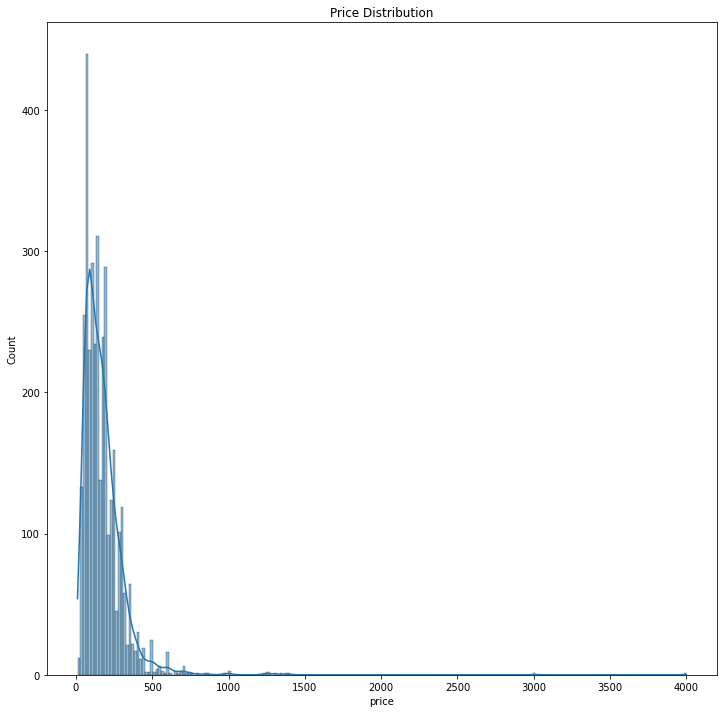

In [161]:
# PRICE
plt.figure(figsize=(12,12))
plt.title("Price Distribution")
sns.histplot(cleaned_listing_df1.price, kde = True)
plt.show()

In [160]:
cleaned_listing_df1.price.describe()

count    3557.000000
mean      174.136351
std       148.710580
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

#### 1. the distribution seems like skewed towards the left - 2. 75% of the listings are below 220 USD 3. very few points more than 400-500 USD (remove these?) - outliers 4. very few points less than 20 USD (remove these?) - outliers

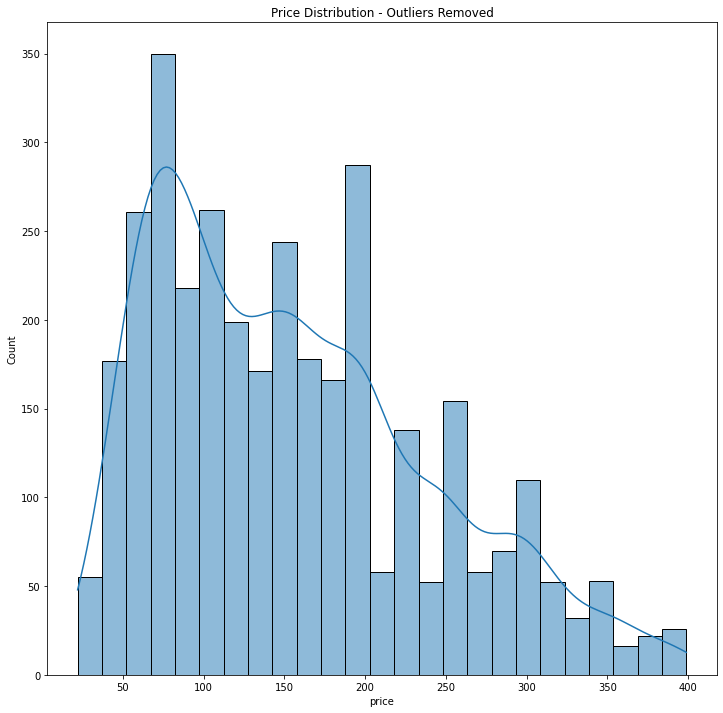

In [23]:
# PRICE
plt.figure(figsize=(12,12))
plt.title("Price Distribution - Outliers Removed")
cleaned_listing_df2 = cleaned_listing_df1[(cleaned_listing_df1['price'] > 20) & (cleaned_listing_df1['price'] < 400)]
sns.histplot(cleaned_listing_df2.price, kde = True)
plt.show()

In [172]:
cleaned_listing_df2.price.describe()
# standard deviation reduced as well

# lets stick between 20 and 400 (excluded)

count    3409.000000
mean      155.493106
std        84.989619
min        22.000000
25%        84.000000
50%       145.000000
75%       200.000000
max       399.000000
Name: price, dtype: float64

In [181]:
cleaned_listing_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409 entries, 0 to 3584
Data columns (total 89 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3409 non-null   int64  
 1   listing_url                       3409 non-null   object 
 2   scrape_id                         3409 non-null   int64  
 3   last_scraped                      3409 non-null   object 
 4   name                              3409 non-null   object 
 5   summary                           3289 non-null   object 
 6   space                             2396 non-null   object 
 7   description                       3409 non-null   object 
 8   experiences_offered               3409 non-null   object 
 9   neighborhood_overview             2075 non-null   object 
 10  notes                             1544 non-null   object 
 11  transit                           2194 non-null   object 
 12  access

#### price and bedrooms/bathrooms/beds are int32 so lets convert these into int64 before checking correlation

In [24]:
cleaned_listing_df2['price'] = cleaned_listing_df2['price'].astype(np.int64)

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    cleaned_listing_df2[col] = cleaned_listing_df2[col].astype(np.int64)

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### correlation between numerical features (and with price)

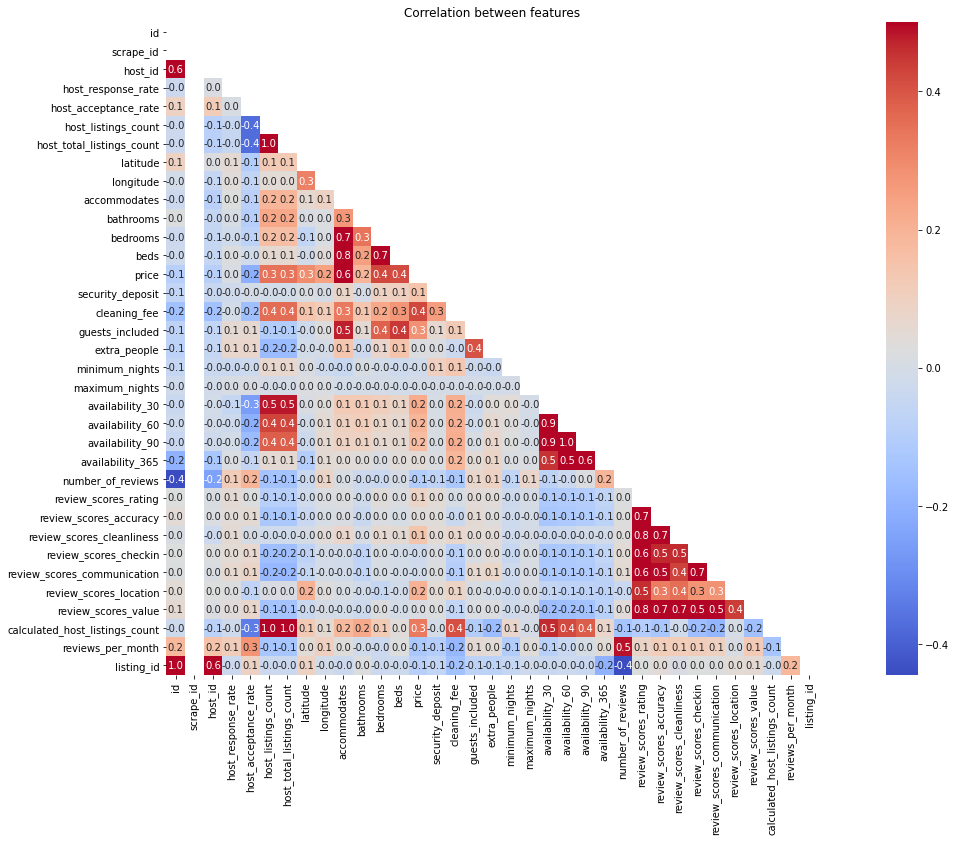

In [193]:
_corr = cleaned_listing_df2.select_dtypes(include=['int64','float64']).corr()
_mask = np.zeros_like(_corr)
_mask[np.triu_indices_from(_mask)] = True
plt.figure(figsize=(24,12))
plt.title('Correlation between features')
sns.heatmap(_corr, mask = _mask, vmax = .5, square=True, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

#### Conclusions: 1.accomodates, bedrooms, bathrooms, beds, guests_included and price highly correlated 2.cleaning fee, postively correlated to security deposit and price 3.extra_people positively correlated with guests_included 4.host_listing_count also positively correlated to price (Drop one of two host_listing_counts)

In [196]:
cleaned_listing_df2[["accommodates", "bedrooms", "bathrooms", "beds", "guests_included"]].nunique(axis  = 0)

accommodates       14
bedrooms            6
bathrooms           7
beds               11
guests_included     9
dtype: int64

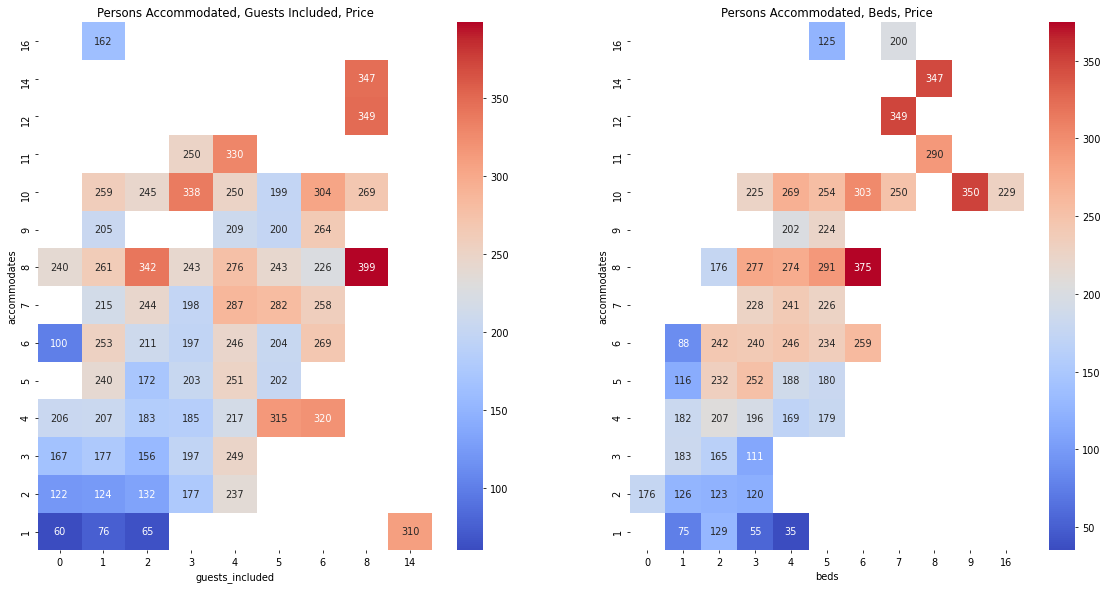

In [199]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), dpi=70)
axs[0].set_title('Persons Accommodated, Guests Included, Price')
axs[1].set_title('Persons Accommodated, Beds, Price')

accomm_guests_mean_price = cleaned_listing_df2.groupby(['accommodates', 'guests_included']).mean().price.reset_index().pivot('accommodates','guests_included','price').sort_index(ascending=False)
accomm_beds_mean_price = cleaned_listing_df2.groupby(['accommodates', 'beds']).mean().price.reset_index().pivot('accommodates','beds','price').sort_index(ascending=False)

sns.heatmap(accomm_guests_mean_price, cmap="coolwarm", fmt='.0f', annot=True, ax=axs[0])
sns.heatmap(accomm_beds_mean_price, cmap="coolwarm", fmt='.0f', annot=True, ax=axs[1])
plt.show()

#### Conclusions: 1.ofcourse with more people being accommodated/guests included/beds - prices are higher 2.except for beds = 2, there is some pattern from 1-3-4 beds (and a decreasing one!) of 20 USD difference 3.some inconsistencies here and there in prices (left and right heatmaps) - these could be because of fewer data points/listings in that group

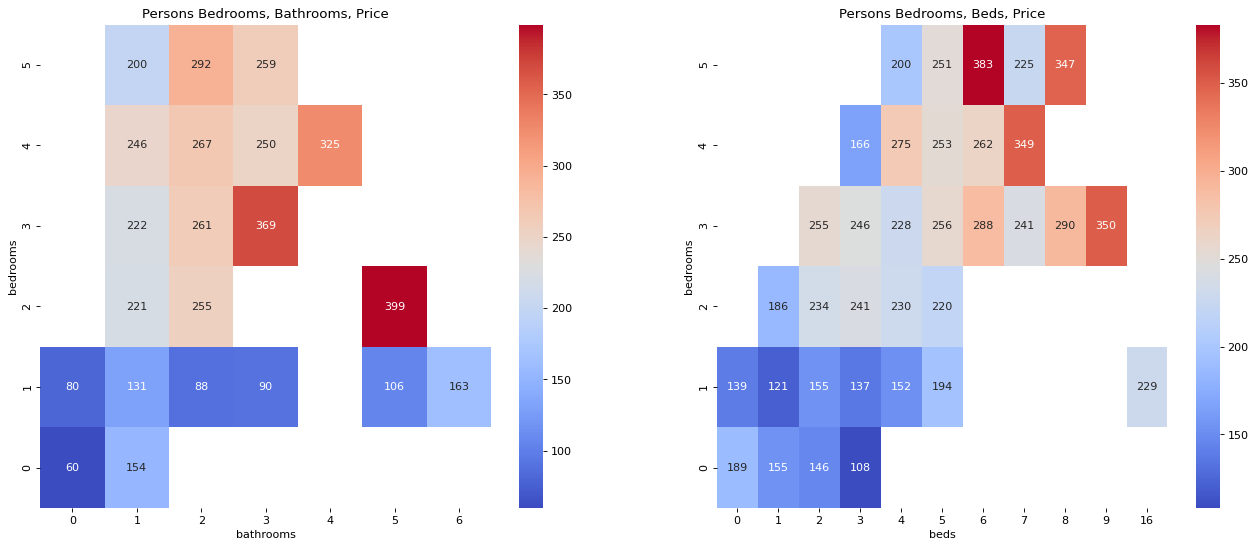

In [202]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8), dpi=80)
axs[0].set_title('Persons Bedrooms, Bathrooms, Price')
axs[1].set_title('Persons Bedrooms, Beds, Price')

bedrooms_bathrooms_mean_price = cleaned_listing_df2.groupby(['bedrooms', 'bathrooms']).mean().price.reset_index().pivot('bedrooms','bathrooms','price').sort_index(ascending=False)
bedrooms_beds_mean_price = cleaned_listing_df2.groupby(['bedrooms', 'beds']).mean().price.reset_index().pivot('bedrooms','beds','price').sort_index(ascending=False)

sns.heatmap(bedrooms_bathrooms_mean_price, cmap="coolwarm", fmt='.0f', annot=True, ax=axs[0])
sns.heatmap(bedrooms_beds_mean_price, cmap="coolwarm", fmt='.0f', annot=True, ax=axs[1])
plt.show()

#### Conclusions: 1. from 2 bedrooms and above with 2 bathrooms and more - prices are more than 250 USD 2. 2 bedrooms or less with 5 beds or less - prices are less than 250 USD (actually its all of 2 bedrooms or less)

In [208]:
# cleaned_listing_df2[cleaned_listing_df2['bedrooms'] == 0].count()
# 286
# cleaned_listing_df2[cleaned_listing_df2['beds'] == 0].count()
# 4
# cleaned_listing_df2[cleaned_listing_df2['bathrooms'] == 0].count()
# 18

# so while only 4 listings have 0 beds and 18 listings have 0 bathrooms, 286 listings have 0 bedrooms

id                                  18
listing_url                         18
scrape_id                           18
last_scraped                        18
name                                18
                                    ..
require_guest_profile_picture       18
require_guest_phone_verification    18
calculated_host_listings_count      18
reviews_per_month                   18
listing_id                          18
Length: 89, dtype: int64

In [214]:
beds_test = cleaned_listing_df2[cleaned_listing_df2['bathrooms'] == 0]

In [ ]:
# # lets remove listings with beds/bedrooms/bathrooms = 0? does it make sense?
# the above check says - 
# 1.that not necesserily a "no bedroom" listing can't be inhabitated - as these are studio apartments - and these are definitely chosen by a lot of people 
# 2.rest lets check distribution by bedrooms etc for review scores to see if these should be kept? (for bathrooms = 0 and beds = 0): though these are very few in number 

In [222]:
check = cleaned_listing_df2.groupby(['bedrooms', 'bathrooms']).mean().review_scores_value.reset_index().pivot('bedrooms','bathrooms', 'review_scores_value').sort_index(ascending=False)

In [223]:
# check
# these are few in number but have scores on par with other average review scores - so lets keep these!

bathrooms,0,1,2,3,4,5,6
bedrooms,,,,,,,
5,NaN,9.587527,9.025008,9.175055,NaN,NaN,NaN
4,NaN,9.478587,9.368344,9.666667,10.0,NaN,NaN
3,NaN,9.316546,9.290397,8.635011,NaN,NaN,NaN
2,NaN,9.178980,9.119831,NaN,NaN,9.175055,NaN
1,8.864719,9.189139,9.117040,8.759101,NaN,8.587527,8.5
0,9.175055,9.139483,NaN,NaN,NaN,NaN,NaN


## Exploring Categorical Features

In [225]:
cleaned_listing_df2.select_dtypes(include = ['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3409 entries, 0 to 3584
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   listing_url                       3409 non-null   object
 1   last_scraped                      3409 non-null   object
 2   name                              3409 non-null   object
 3   summary                           3289 non-null   object
 4   space                             2396 non-null   object
 5   description                       3409 non-null   object
 6   experiences_offered               3409 non-null   object
 7   neighborhood_overview             2075 non-null   object
 8   notes                             1544 non-null   object
 9   transit                           2194 non-null   object
 10  access                            2002 non-null   object
 11  interaction                       1943 non-null   object
 12  house_rules         

In [ ]:
# check few distributions across neighbourhoods, cancellation policy etc for prices and review scores too?

In [ ]:
# lets start plotting!

In [ ]:
# 1. lets check neighbourhood and price distributions

No handles with labels found to put in legend.


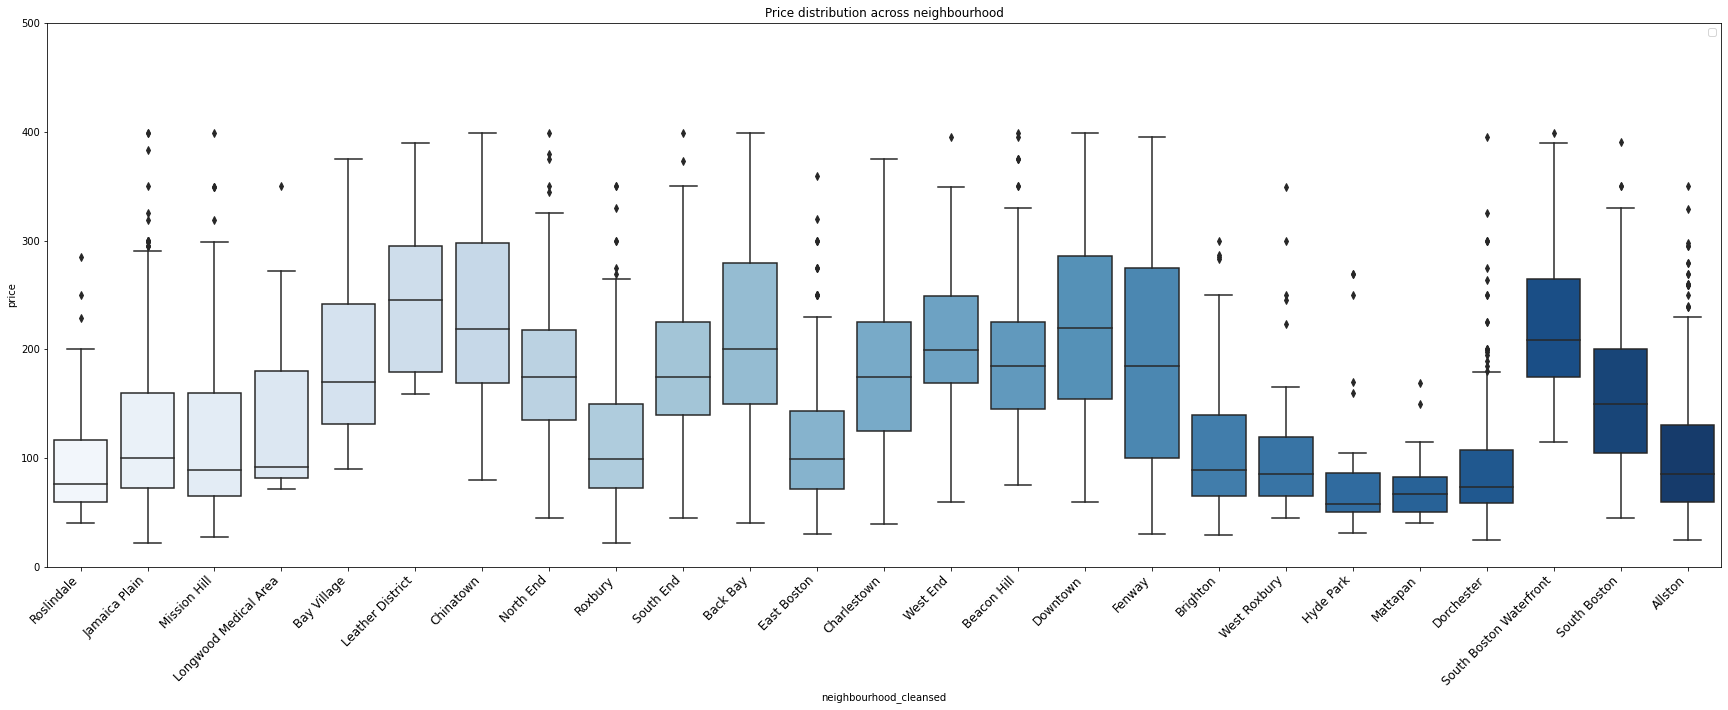

In [230]:
plt.figure(figsize=(30,10))
plt.title("Price distribution across neighbourhood")

sns.boxplot(x=cleaned_listing_df2["neighbourhood_cleansed"], y=cleaned_listing_df2["price"], palette="Blues")
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.ylim([0,500])
plt.legend()
plt.show()

plt.show()

In [ ]:
# not getting into distributions etc for the current purpose

#### Conclusions: 1. more expensive neighbourhoods: Downtown, Fenway, Back Bay, Chinatown, Leather District (this starts at a higher price too) 2. cheaper neighbourhoods : Hyde Park, Mattapan, Roslindale, West Roxbury, Dorchester

In [ ]:
# lets check the distribution of listings in each neighbourhood

In [245]:
neighbourhood_df  = cleaned_listing_df2['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)

In [246]:
neighbourhood_df = neighbourhood_df.reset_index(name = 'count').rename(columns = {'index' : 'neighbourhood'})

No handles with labels found to put in legend.


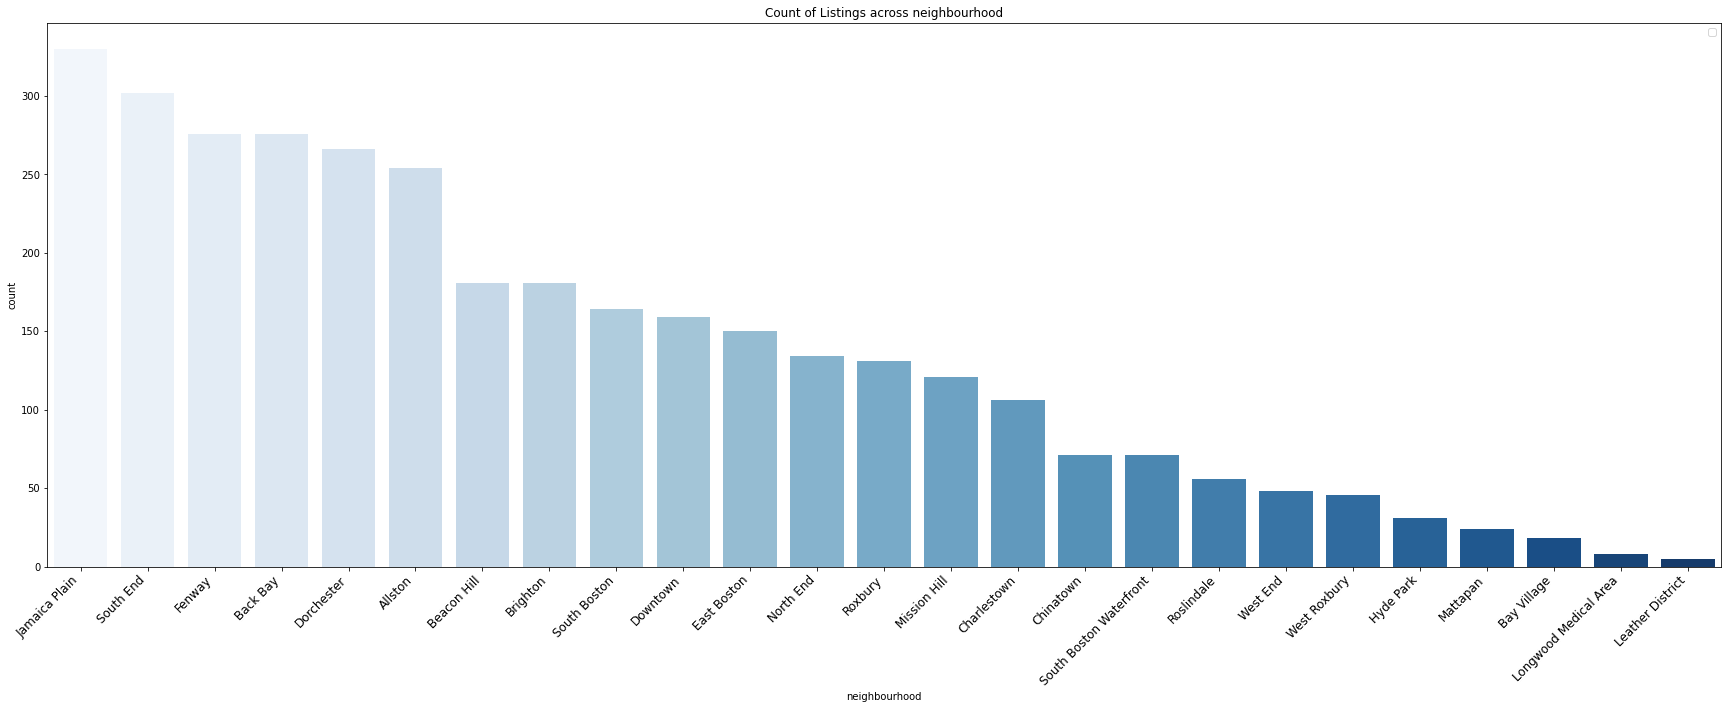

In [247]:
plt.figure(figsize=(30,10))
plt.title("Count of Listings across neighbourhood")

sns.barplot(data = neighbourhood_df, x="neighbourhood", y="count", palette="Blues")
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.legend()
plt.show()


#### Conclusions:  1. Jamaica Plain, South End, Fenway, Back Bay and Dorchester - Top 5  2. Leather District and Longwood Medical Area - Bottom 2

No handles with labels found to put in legend.


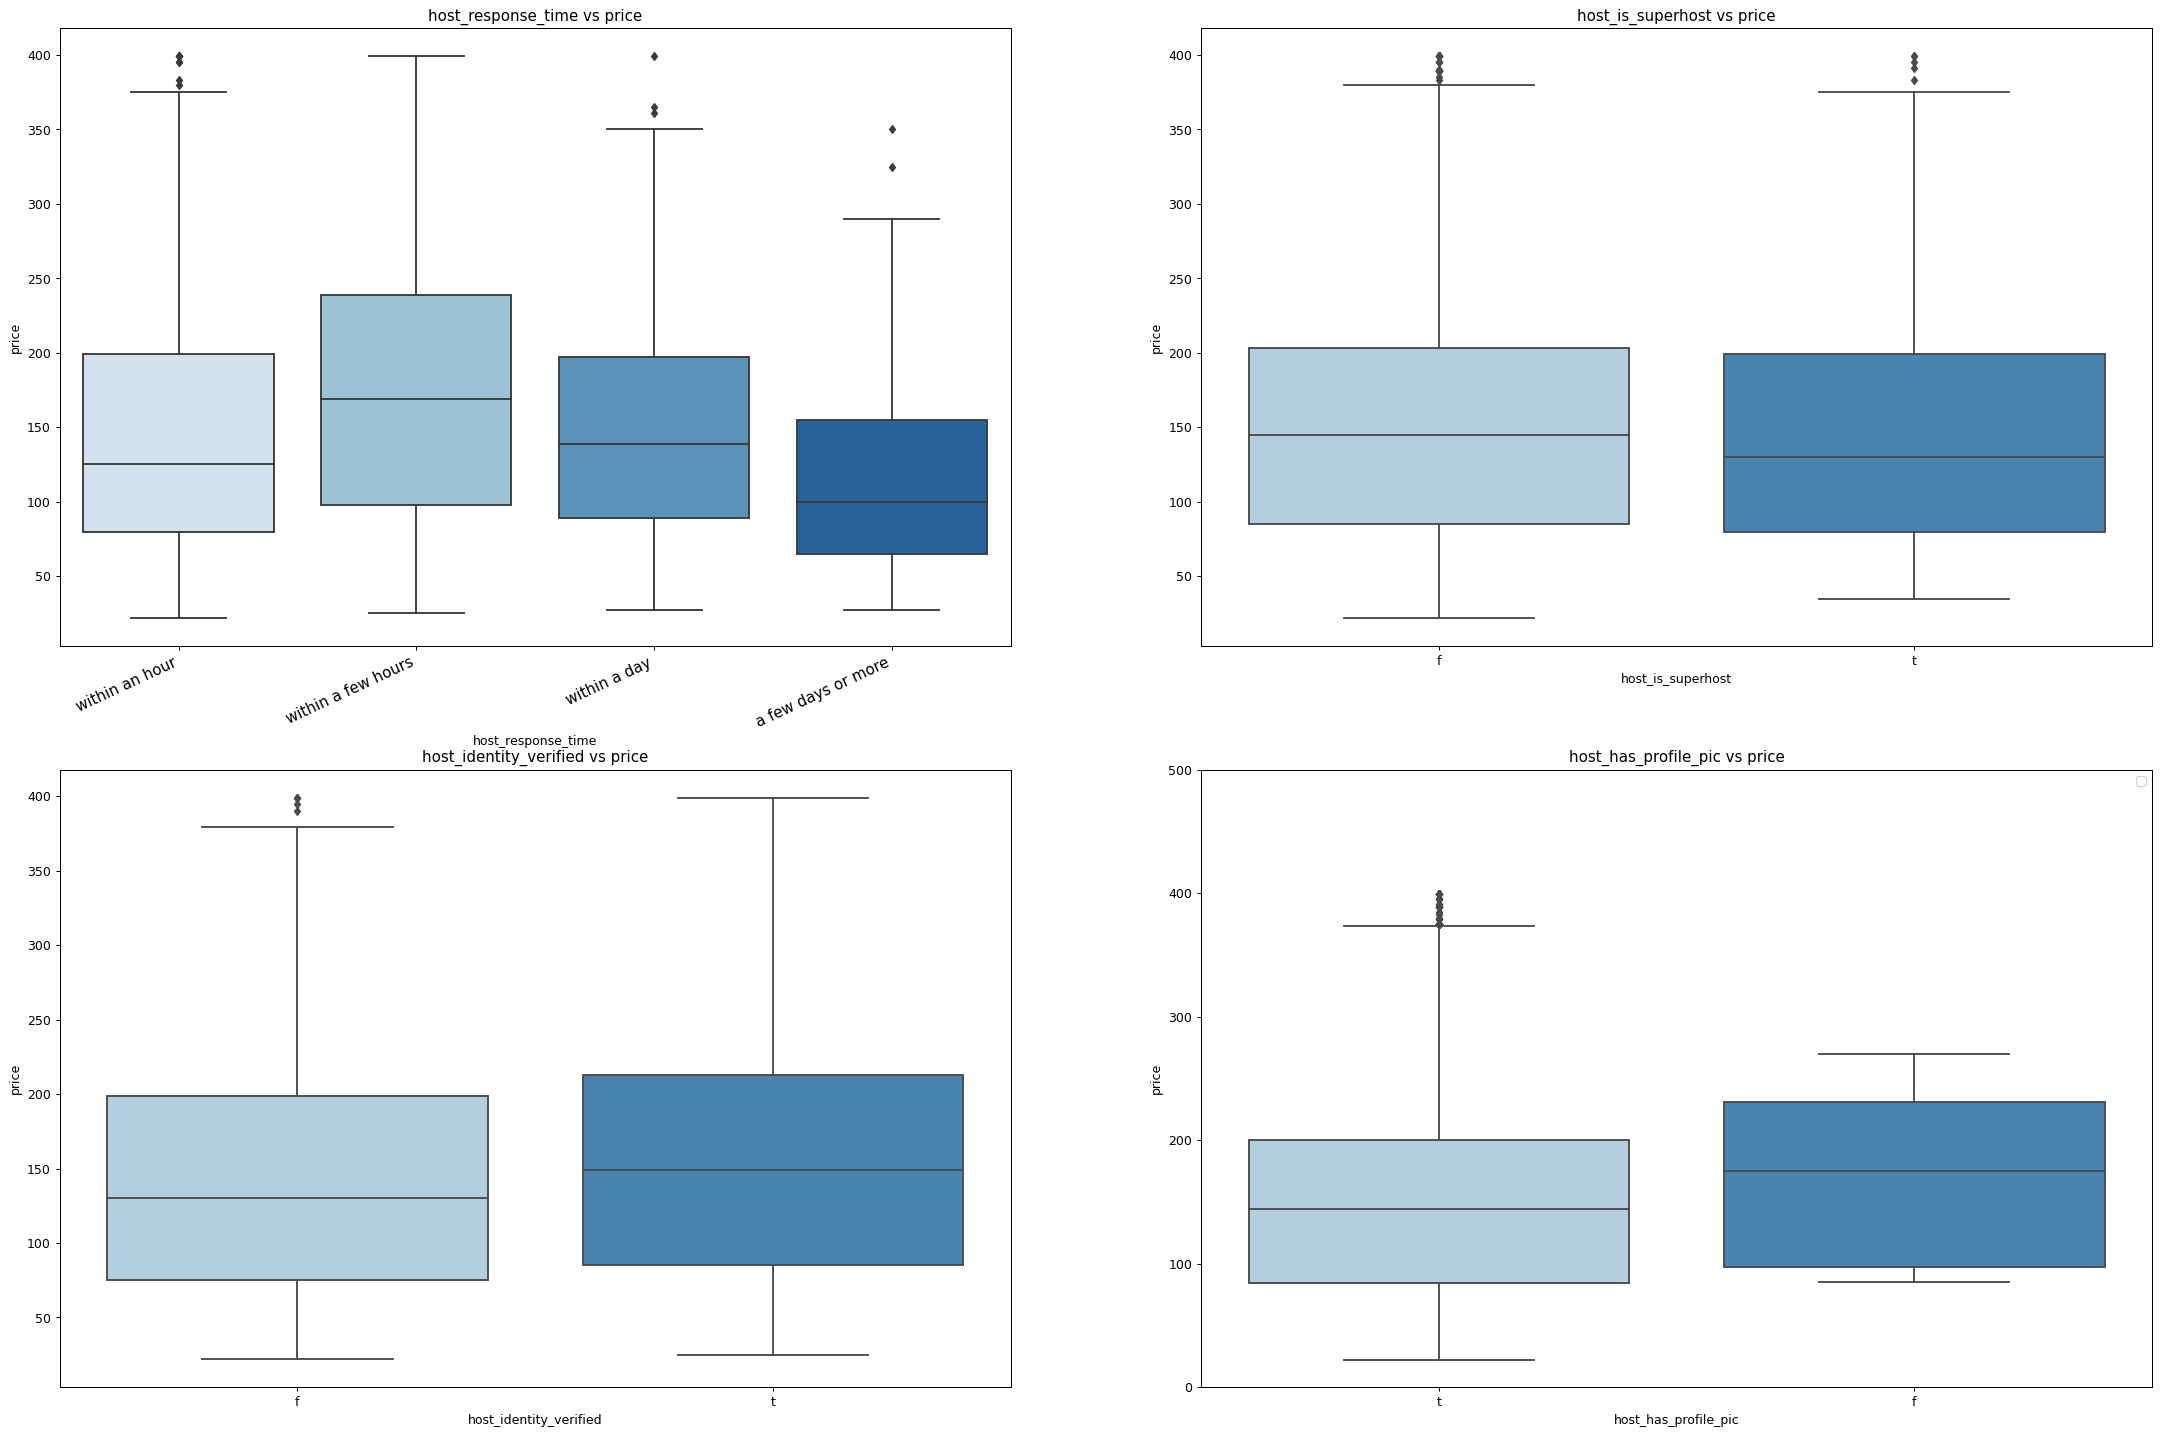

In [249]:
# Lets look at other distributions a bit

# starting with host related variables-
# 1. host_response_time
# 2. host_is_superhost
# 3. host_identity_verified
# 4. host_has_profile_pic


fig, axs = plt.subplots(2, 2, figsize=(30, 20), dpi=90)


axs[0,0].set_title('host_response_time vs price')
p1 = sns.boxplot(data=cleaned_listing_df2, x='host_response_time', y='price', ax=axs[0,0], palette="Blues")
p1.set_xticklabels(p1.get_xticklabels(), rotation=25, ha='right', fontsize=12)

axs[0,1].set_title('host_is_superhost vs price')
sns.boxplot(data=cleaned_listing_df2, x='host_is_superhost', y='price', ax=axs[0,1], palette="Blues")

axs[1,0].set_title('host_identity_verified vs price')
sns.boxplot(data=cleaned_listing_df2, x='host_identity_verified', y='price', ax=axs[1,0], palette="Blues")

axs[1,1].set_title('host_has_profile_pic vs price')
sns.boxplot(data=cleaned_listing_df2, x='host_has_profile_pic', y='price', ax=axs[1,1], palette="Blues")


plt.ylim([0,500])
plt.legend()
plt.show()


No handles with labels found to put in legend.


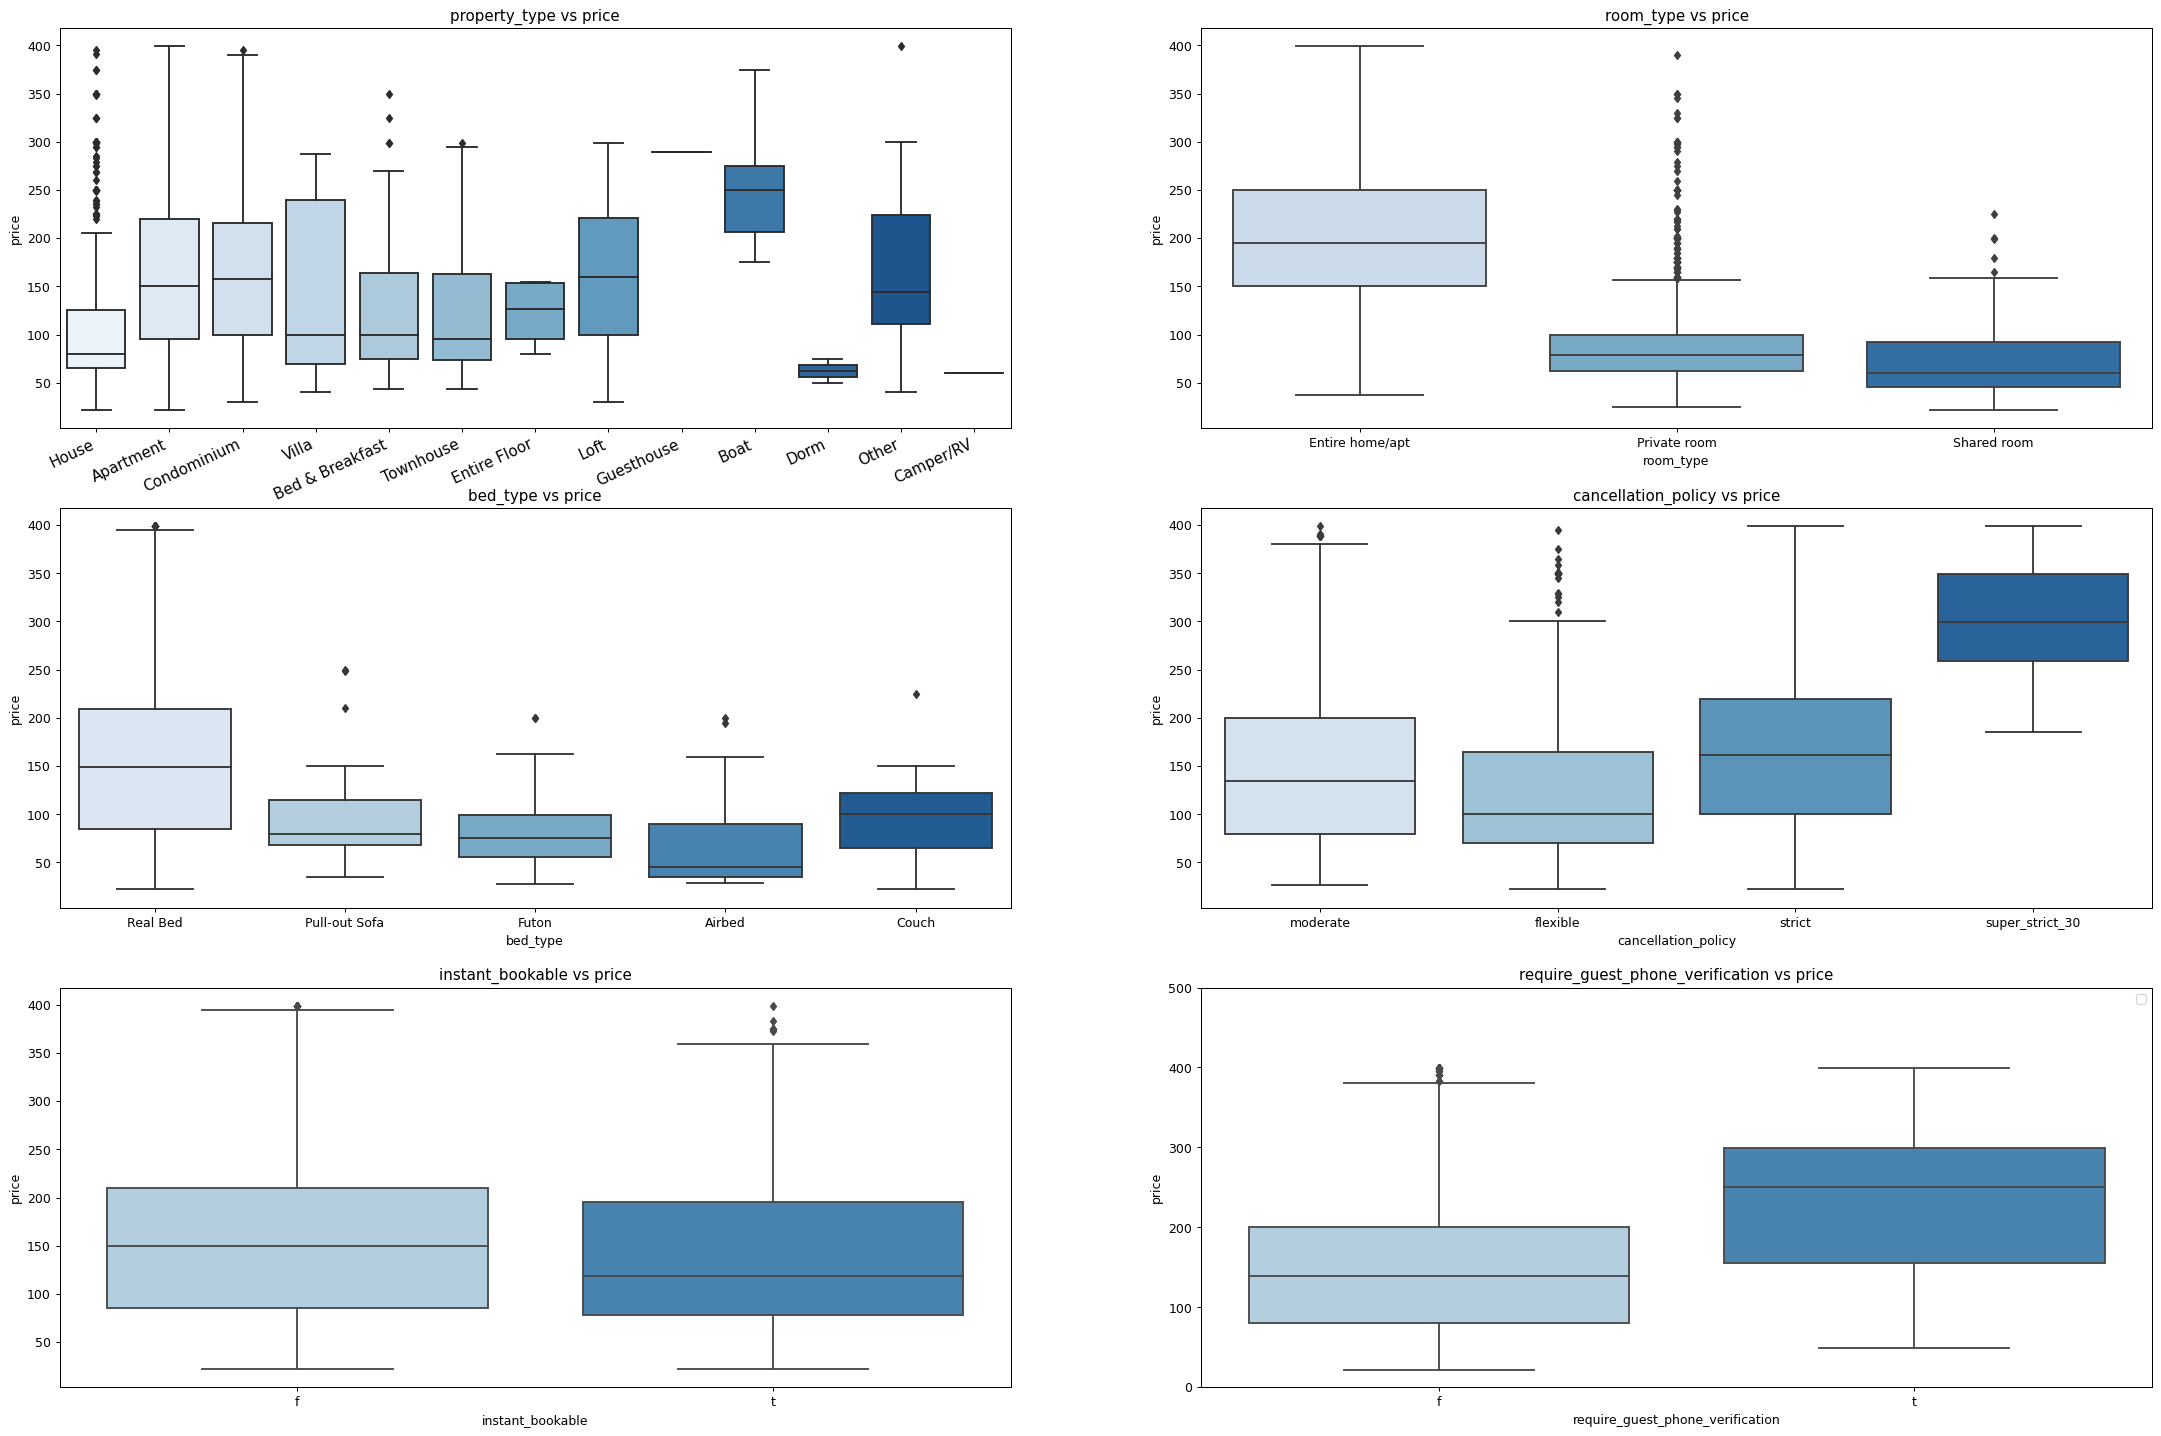

In [251]:
# Lets look at other distributions a bit

# starting with listing/property/booking related variables-
# 1. property_type
# 2. room_type
# 3. bed_type
# 4. cancellation_policy
# 5. instant_bookable
# 6. require_guest_phone_verification

fig, axs = plt.subplots(3, 2, figsize=(30, 20), dpi=90)


axs[0,0].set_title('property_type vs price')
p1 = sns.boxplot(data=cleaned_listing_df2, x='property_type', y='price', ax=axs[0,0], palette="Blues")
p1.set_xticklabels(p1.get_xticklabels(), rotation=25, ha='right', fontsize=12)

axs[0,1].set_title('room_type vs price')
sns.boxplot(data=cleaned_listing_df2, x='room_type', y='price', ax=axs[0,1], palette="Blues")

axs[1,0].set_title('bed_type vs price')
sns.boxplot(data=cleaned_listing_df2, x='bed_type', y='price', ax=axs[1,0], palette="Blues")

axs[1,1].set_title('cancellation_policy vs price')
sns.boxplot(data=cleaned_listing_df2, x='cancellation_policy', y='price', ax=axs[1,1], palette="Blues")

axs[2,0].set_title('instant_bookable vs price')
sns.boxplot(data=cleaned_listing_df2, x='instant_bookable', y='price', ax=axs[2,0], palette="Blues")

axs[2,1].set_title('require_guest_phone_verification vs price')
sns.boxplot(data=cleaned_listing_df2, x='require_guest_phone_verification', y='price', ax=axs[2,1], palette="Blues")


plt.ylim([0,500])
plt.legend()
plt.show()


#### Conclusions: HOST RELATED - 1. interestingly - listings with higher prices tend to have host's profile picture available  2. superhost vs non-superhost doesnt seem to show much differences in prices (it looks neck to neck with minor differences) -though this is surprising 3. listings with higher prices tend to have host's identify verified 4. response time shows a good variation (distribution) - with listings with higher prices showing responses within few hours/or an hour itself (more active?)

#### Conclusions: LISTING/PROPERTY/BOOKING RELATED - 1. Villa, Loft, Boat, Guesthouses + Other? - seem more expensive (expected ofcourse) 2. Entire Home more expensive 3. Real bed more comforting, hence more expensive ofcourse 4. listings with higher prices have stricter cancellation policy - again expected 5. though not much difference is evident from the distribution - but listings that are priced higher - might show less instant_bookable options 6. higher priced listings required guest phone verification!

## what do we select finally as variables?

#### NUMERICAL : price, latitude,longitude, accommodates, bedrooms, bathrooms, beds, security_deposit, cleaning_fee, guests_included, availability_30, availability_60, availability_90, availability_365, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_location, review_scores_value, calculated_host_listings_count


#### CATEGORICAL : host_response_time, room_type, bed_type, neighbourhood_cleansed, cancellation_policy, property_type, host_identity_verified, host_has_profile_pic, require_guest_profile_picture, require_guest_phone_verification, instant_bookable, host_is_superhost

In [ ]:
# creating two datasets in order to check if instant_bookable, host_is_superhost indeed add value

In [26]:
sel_col_df = cleaned_listing_df2[["price", "latitude","longitude", "accommodates", "bedrooms", "bathrooms", "beds", "security_deposit", "cleaning_fee", "guests_included", "availability_30", "availability_60", "availability_90", "availability_365", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_location", "review_scores_value", "calculated_host_listings_count", "host_response_time", "room_type", "bed_type", "neighbourhood_cleansed", "cancellation_policy", "property_type", "host_identity_verified", "host_has_profile_pic", "require_guest_profile_picture", "require_guest_phone_verification"]]

In [27]:
sel_col_df2 = cleaned_listing_df2[["price", "latitude","longitude", "accommodates", "bedrooms", "bathrooms", "beds", "security_deposit", "cleaning_fee", "guests_included", "availability_30", "availability_60", "availability_90", "availability_365", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_location", "review_scores_value", "calculated_host_listings_count", "host_response_time", "room_type", "bed_type", "neighbourhood_cleansed", "cancellation_policy", "property_type", "host_identity_verified", "host_has_profile_pic", "require_guest_profile_picture", "require_guest_phone_verification", "instant_bookable", "host_is_superhost"]]

## Creating dummy variables for Categorical features

In [28]:
def create_dummy_df(df, cat_cols, dummy_na=False):
    for col in cat_cols:
        try:
           
            df = pd.concat([df.drop(col, axis = 1), pd.get_dummies(df[col], prefix = col, prefix_sep = '_', drop_first = True, dummy_na = dummy_na)], axis =1)
        
        except:
            continue
    
    return df

In [ ]:
# testing it for sel_col_df

In [29]:
cat_cols = sel_col_df.select_dtypes(include = ['object']).columns

In [30]:
sel_col_dummy_df = create_dummy_df(sel_col_df, cat_cols = cat_cols, dummy_na = False)

In [31]:
sel_col_df.shape

(3409, 30)

In [32]:
sel_col_dummy_df.shape

(3409, 72)

In [ ]:
# testing it for sel_col_df2

In [33]:
cat_cols_2 = sel_col_df2.select_dtypes(include = ['object']).columns

In [34]:
sel_col_dummy_df2 = create_dummy_df(sel_col_df2, cat_cols = cat_cols_2, dummy_na = False)

#### Modelling Price - Let's check how we'd prefer our target variable to be for the model

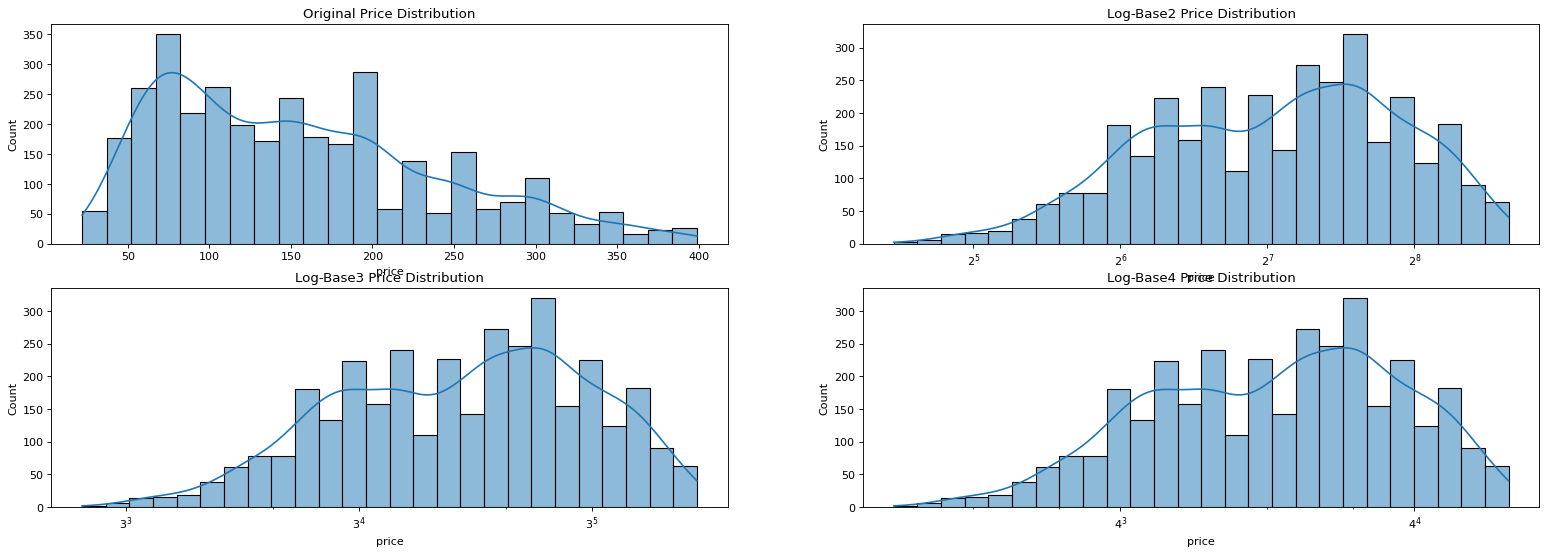

In [266]:
fig, axs = plt.subplots(2, 2, figsize=(24, 8), dpi=80)

axs[0,0].set_title('Original Price Distribution')
sns.histplot(sel_col_dummy_df['price'], kde=True, ax=axs[0,0])

axs[0,1].set_title('Log-Base2 Price Distribution')
sns.histplot(sel_col_dummy_df['price'], kde=True, log_scale = 2, ax=axs[0,1])

axs[1,0].set_title('Log-Base3 Price Distribution')
sns.histplot(sel_col_dummy_df['price'], kde=True, log_scale = 3, ax=axs[1,0])

axs[1,1].set_title('Log-Base4 Price Distribution')
sns.histplot(sel_col_dummy_df['price'], kde=True, log_scale = 4, ax=axs[1,1])

plt.show()


In [ ]:
# log seems better
# lets take log base 2

## Fitting, Predicting, Evaluating Price Model - Linear Regression/Random Forest Regressor

No handles with labels found to put in legend.


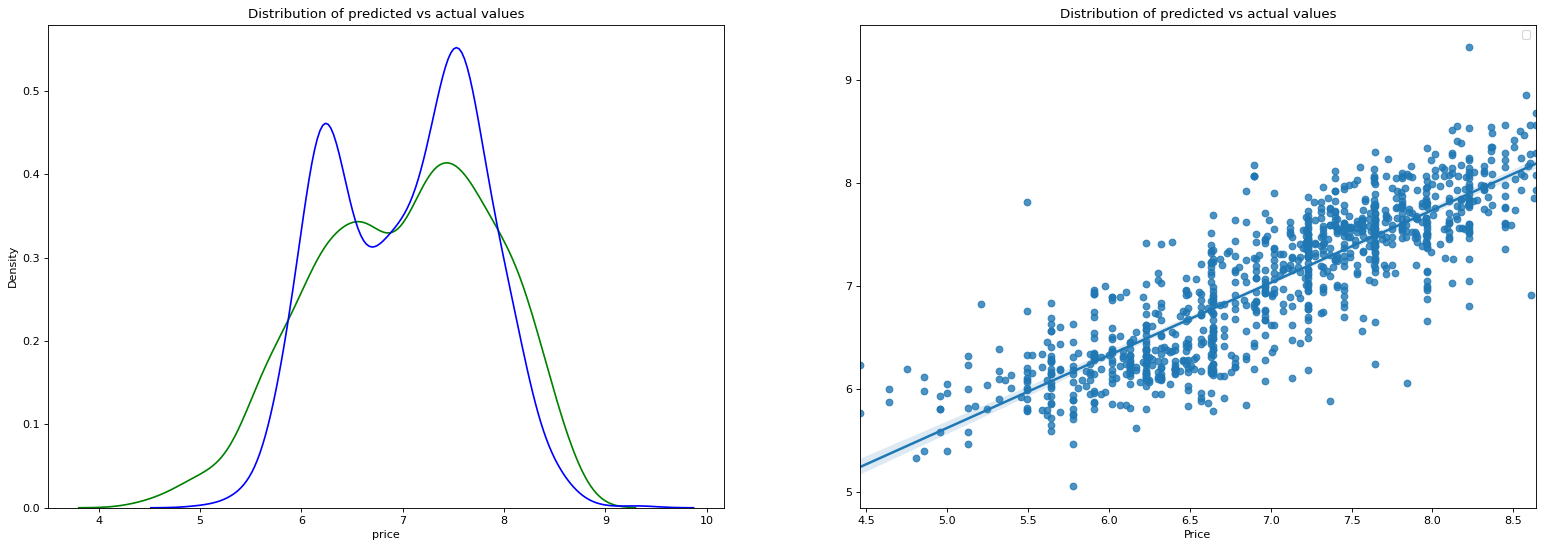

R sqaure of LinearRegression(normalize=True): 0.7208447182219924


No handles with labels found to put in legend.


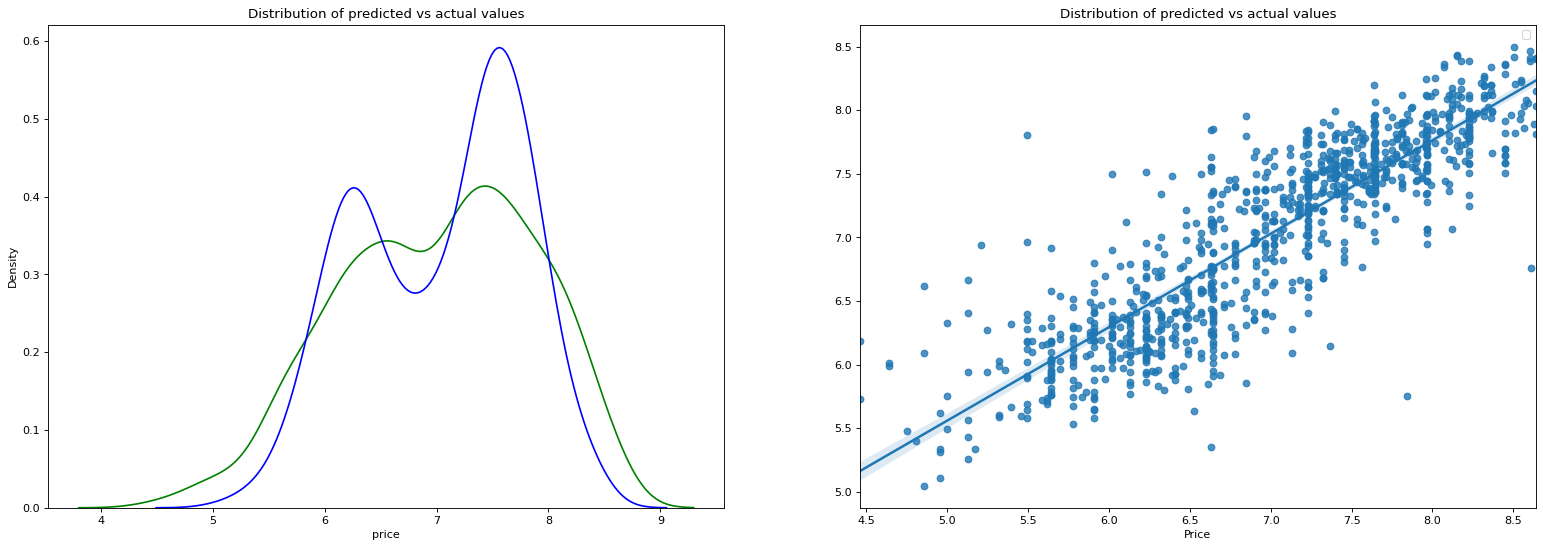

R sqaure of RandomForestRegressor(n_estimators=76, random_state=42): 0.757991396140423


In [270]:
# lets test with r2 first
X = sel_col_dummy_df.drop('price',  axis = 1 )
y = np.log2(sel_col_dummy_df['price'].astype(int))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

def fit_predict_evaluate_model_r2(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    r2 = r2_score(y_test, prediction)
    
    fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
    axs[0].set_title('Distribution of predicted vs actual values')
    ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
    ax2 = sns.kdeplot(data=prediction, color="b", label='Predicted values', ax=ax1)
    
    sns.regplot(x=y_test, y=prediction)
    plt.title('Distribution of predicted vs actual values')
    plt.xlabel('Price')
    plt.legend()
    plt.show()
    plt.close()
    
    print("R sqaure of {0}: {1}".format(model, r2))
    

# Create instance of Linear Regressor and evaluate the same
model_lr = LinearRegression(normalize = True)
fit_predict_evaluate_model_r2(model_lr, X_train, y_train, X_test, y_test)

    
# Create instance of Random Forest Regressor and evaluate model
model_rf = RandomForestRegressor(n_estimators=76, random_state=42)    
fit_predict_evaluate_model_r2(model_rf, X_train, y_train, X_test, y_test)
    
    


No handles with labels found to put in legend.


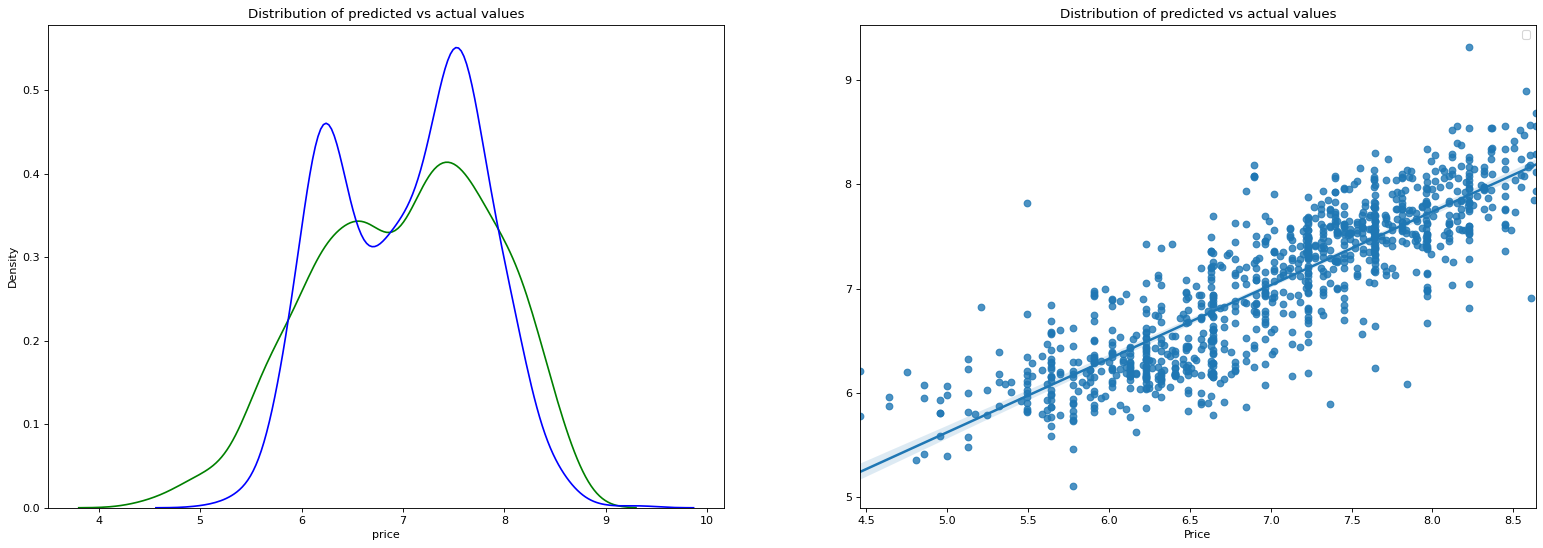

R sqaure of LinearRegression(normalize=True): 0.7229668166544041


No handles with labels found to put in legend.


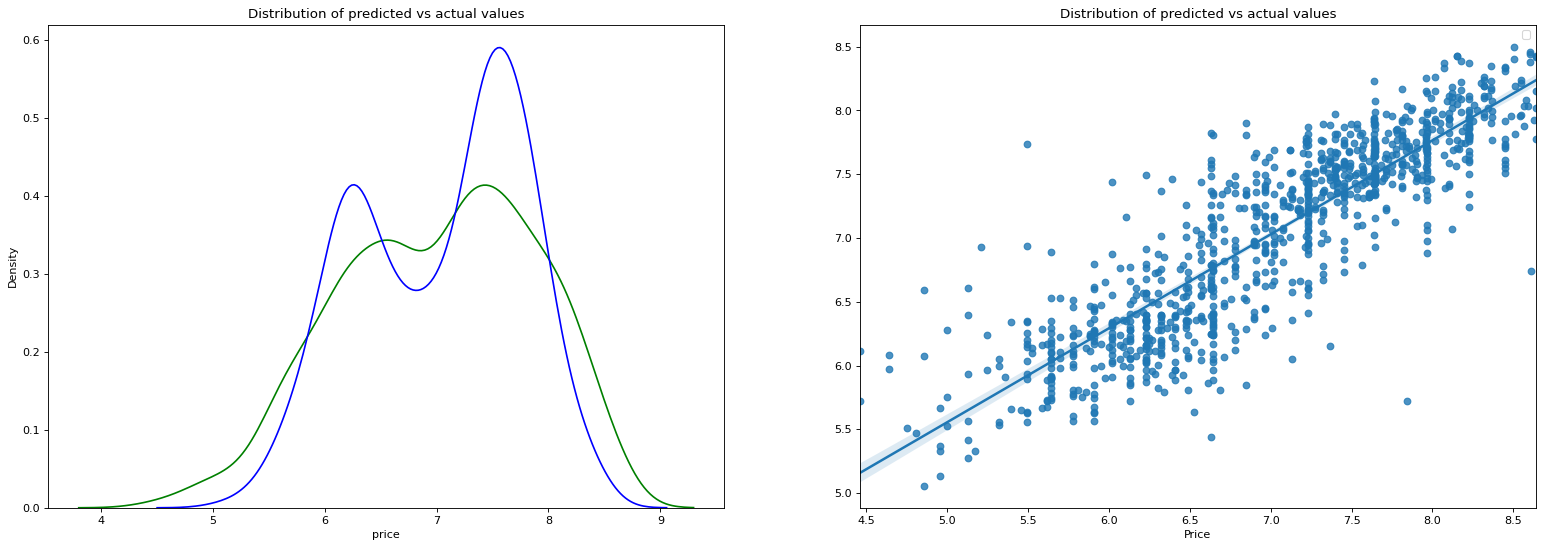

R sqaure of RandomForestRegressor(n_estimators=76, random_state=42): 0.7602466021795393


In [275]:
# second dataset!
# lets test with r2 first
X = sel_col_dummy_df2.drop('price',  axis = 1 )
y = np.log2(sel_col_dummy_df2['price'].astype(int))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

def fit_predict_evaluate_model_r2(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    r2 = r2_score(y_test, prediction)
    
    fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
    axs[0].set_title('Distribution of predicted vs actual values')
    ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
    ax2 = sns.kdeplot(data=prediction, color="b", label='Predicted values', ax=ax1)
    
    sns.regplot(x=y_test, y=prediction)
    plt.title('Distribution of predicted vs actual values')
    plt.xlabel('Price')
    plt.legend()
    plt.show()
    plt.close()
    
    print("R sqaure of {0}: {1}".format(model, r2))
    

# Create instance of Linear Regressor and evaluate the same
model_lr = LinearRegression(normalize = True)
fit_predict_evaluate_model_r2(model_lr, X_train, y_train, X_test, y_test)

    
# Create instance of Random Forest Regressor and evaluate model
model_rf = RandomForestRegressor(n_estimators=76, random_state=42)    
fit_predict_evaluate_model_r2(model_rf, X_train, y_train, X_test, y_test)
    
    


#### Random Forest definitely shows a better R2 score as compared to Linear Regression (76% vs 72%)

#### Lets see if we can tune the n_estimators hyperparameter using a Model Complexity Graph

No handles with labels found to put in legend.


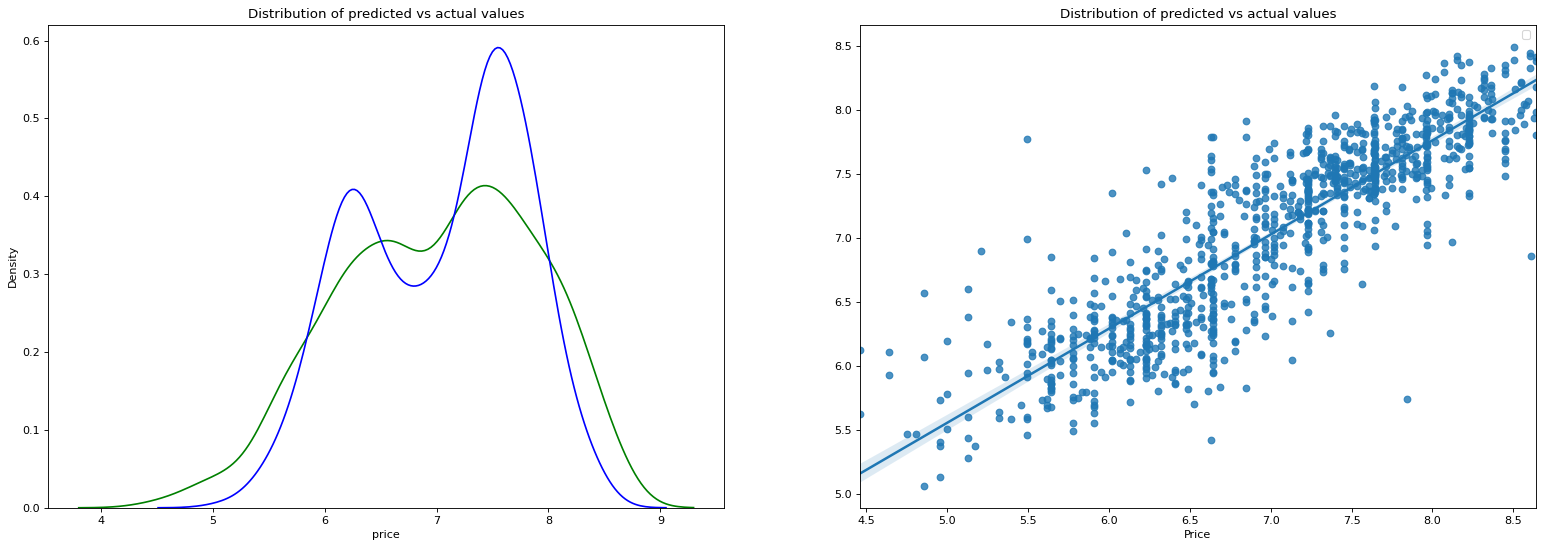

R sqaure of RandomForestRegressor(n_estimators=250, random_state=42): 0.7636410685132904


In [313]:
# second dataset!
# lets test with r2 first
X = sel_col_dummy_df2.drop('price',  axis = 1 )
y = np.log2(sel_col_dummy_df2['price'].astype(int))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

def fit_predict_evaluate_model_r2(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    r2 = r2_score(y_test, prediction)
    
    fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
    axs[0].set_title('Distribution of predicted vs actual values')
    ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
    ax2 = sns.kdeplot(data=prediction, color="b", label='Predicted values', ax=ax1)
    
    sns.regplot(x=y_test, y=prediction)
    plt.title('Distribution of predicted vs actual values')
    plt.xlabel('Price')
    plt.legend()
    plt.show()
    plt.close()
    
    print("R sqaure of {0}: {1}".format(model, r2))
    
    
# Create instance of Random Forest Regressor and evaluate model
model_rf = RandomForestRegressor(n_estimators = 250, random_state=42)    
fit_predict_evaluate_model_r2(model_rf, X_train, y_train, X_test, y_test)
    
    


### lets try plotting a MODEL COMPLEXITY GRAPH (this can be done for other hyperparameters as well - we will test it for n_estimators only)

In [308]:
# second dataset!
# lets test with r2 first
X = sel_col_dummy_df2.drop('price',  axis = 1 )
y = np.log2(sel_col_dummy_df2['price'].astype(int))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

estimator_list = [20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]
mae_train_list = []
mae_test_list = []

def get_error(X_train, y_train, X_test, y_test):
    
    for i in estimator_list:
        model_rf = RandomForestRegressor(n_estimators = i, random_state=42) 
    
        model_rf.fit(X_train, y_train)
        
        prediction_train = model_rf.predict(X_train)
        prediction_test = model_rf.predict(X_test)
        
        mae_train = mean_absolute_error(y_train, prediction_train)
        mae_test = mean_absolute_error(y_test, prediction_test)
        
        mae_train_list.append(mae_train)
        mae_test_list.append(mae_test)
        
    return mae_train_list, mae_test_list
    
mae_train_list_created, mae_test_list_created = get_error(X_train, y_train, X_test, y_test) 

df_mcg = pd.DataFrame(list(zip(estimator_list, mae_train_list_created, mae_test_list_created)),
               columns =['n_estimators', 'train_mean_absolute_error','test_mean_absolute_error'])
df_mcg


,n_estimators,train_mean_absolute_error,test_mean_absolute_error
0,20,0.124385,0.323591
1,30,0.121319,0.321464
2,40,0.119939,0.319538
3,50,0.118833,0.318962
4,60,0.118412,0.319151
5,70,0.118605,0.318777
6,80,0.118034,0.319277
7,90,0.117702,0.319237
8,100,0.117649,0.319423
9,120,0.117360,0.318860


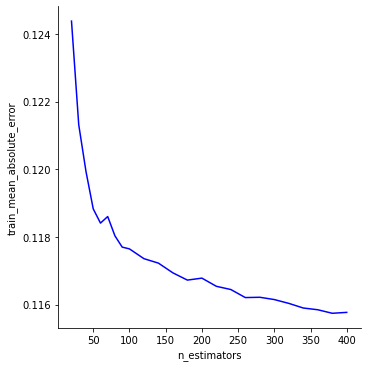

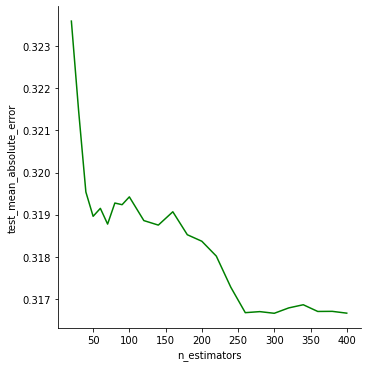

In [332]:
sns.relplot(x=df_mcg["n_estimators"], y=df_mcg["train_mean_absolute_error"], kind="line", color = 'b')
sns.relplot(x=df_mcg["n_estimators"], y=df_mcg["test_mean_absolute_error"], kind="line", color = 'g')

In [ ]:
# other features can be tuned too - I am going to keep it simple for now!

## What are the top features that come out of the Model?

In [ ]:
# lets look at the top 15 features

In [333]:
f_importances = model_rf.feature_importances_

f_names = X_train.columns

f_std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)

zipped = zip(f_importances, f_names, f_std)
zipped_sorted = sorted(zipped, key = lambda x: x[0], reverse =  True)

n_features = 15
imps = [x[0] for x in zipped_sorted[:n_features]]
labels = [x[1] for x in zipped_sorted[:n_features]]
errors = [x[2] for x in zipped_sorted[:n_features]]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

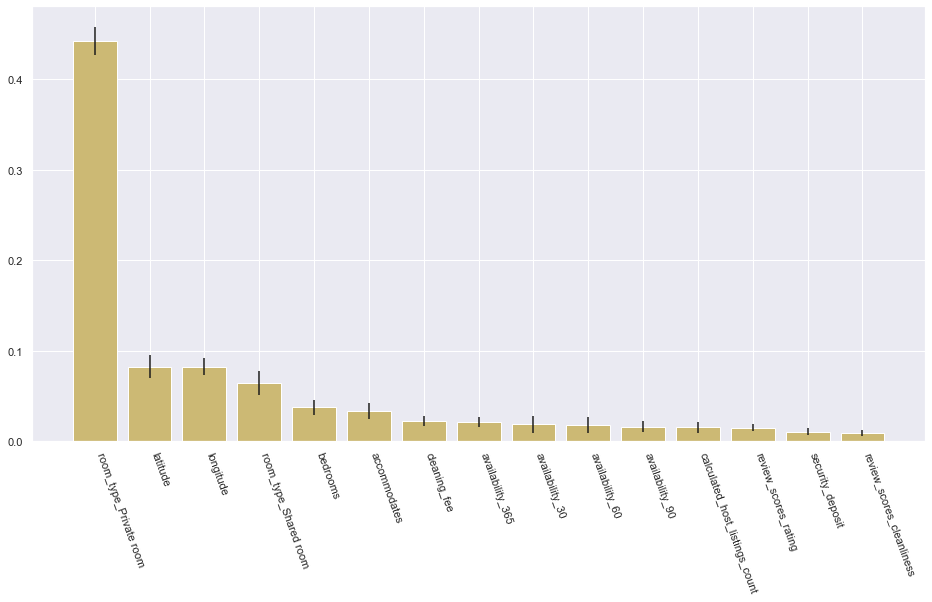

In [371]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.bar(range(n_features), imps, color = "y", yerr = errors)
plt.xticks(range(n_features), labels)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-70, ha="left")

## Making sense of Top Features

<Figure size 5040x2160 with 0 Axes>

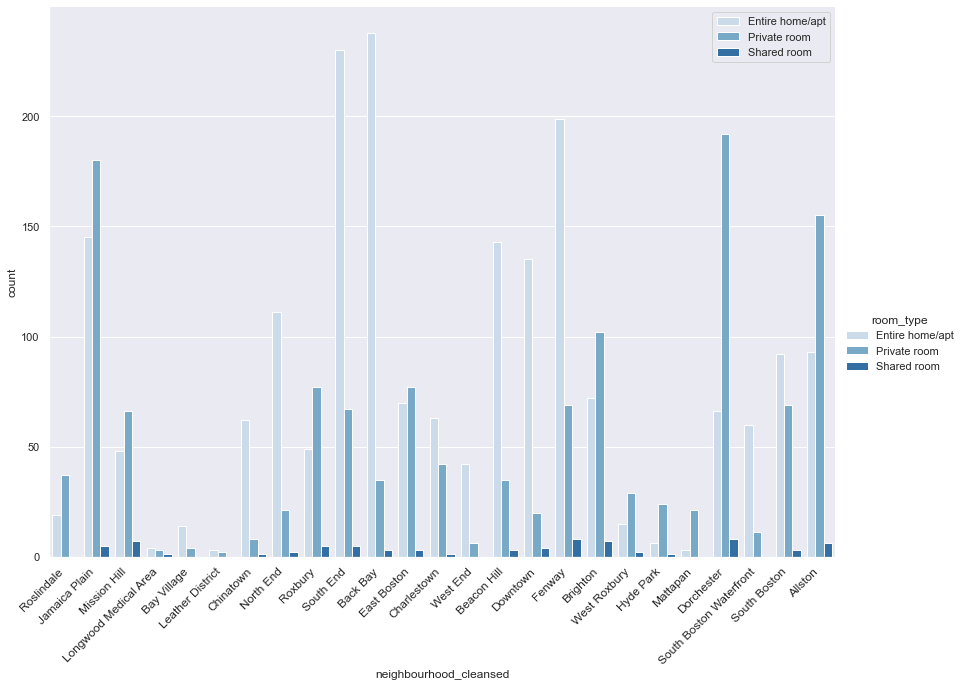

In [359]:
plt.figure(figsize=(70,30))
# plt.title("Count of Listings across neighbourhood by room type")

sns.catplot(x="neighbourhood_cleansed", hue = 'room_type', kind="count", palette="Blues", data=cleaned_listing_df2, height=8.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.legend()
plt.show()

No handles with labels found to put in legend.


<Figure size 5040x2160 with 0 Axes>

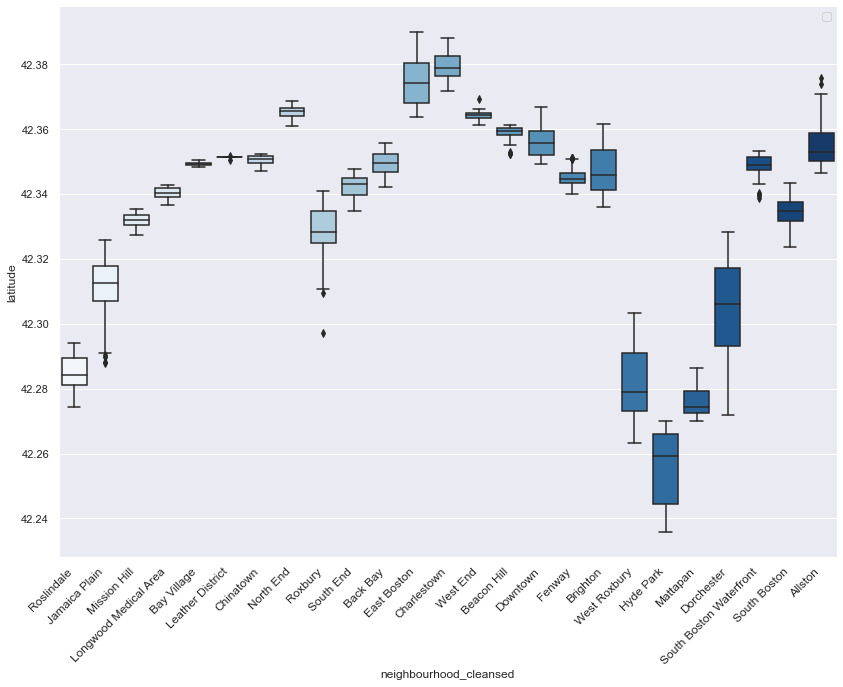

In [362]:
plt.figure(figsize=(70,30))

sns.catplot(x="neighbourhood_cleansed", y = 'latitude', kind="box", palette="Blues", data=cleaned_listing_df2, height=8.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.legend()
plt.show()

No handles with labels found to put in legend.


<Figure size 5040x2160 with 0 Axes>

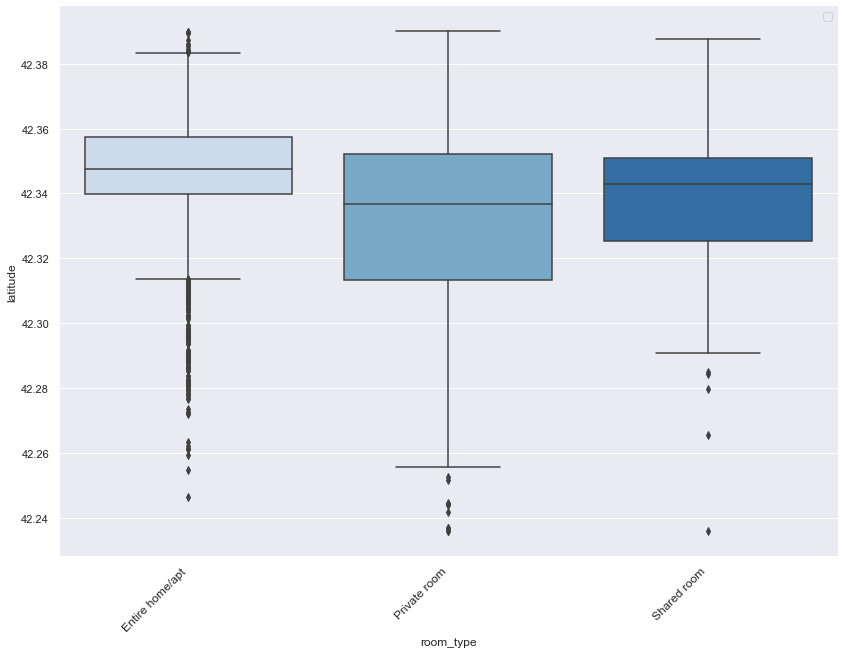

In [368]:
plt.figure(figsize=(70,30))

sns.catplot(x="room_type", y = 'latitude', kind="box", palette="Blues", data=cleaned_listing_df2, height=8.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.legend()
plt.show()

No handles with labels found to put in legend.


<Figure size 5040x2160 with 0 Axes>

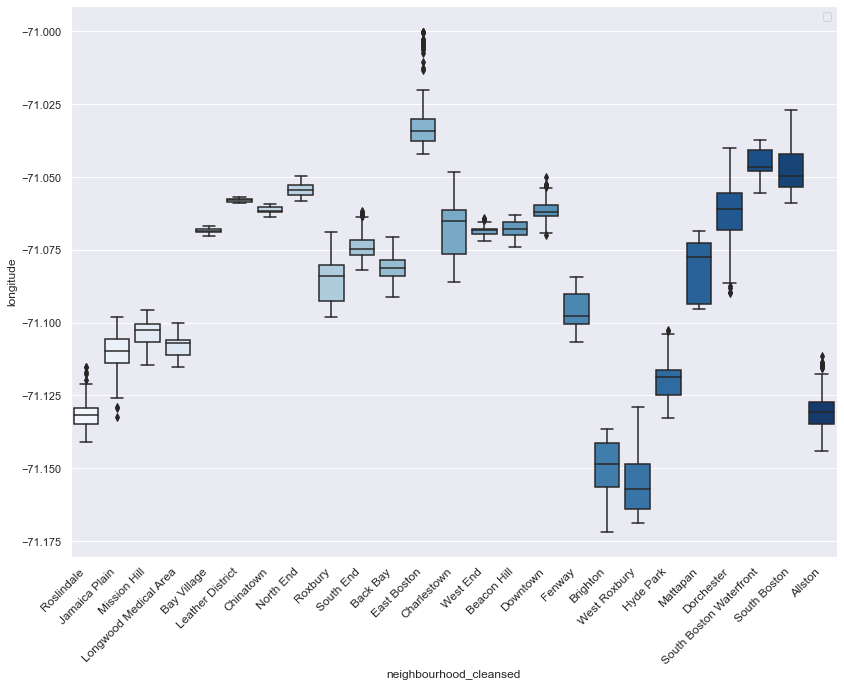

In [370]:
plt.figure(figsize=(70,30))
# plt.title("Count of Listings across neighbourhood by room type")

# sns.set(rc={'figure.figsize':(50,10)})

sns.catplot(x="neighbourhood_cleansed", y = 'longitude', kind="box", palette="Blues", data=cleaned_listing_df2, height=8.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.legend()
plt.show()

No handles with labels found to put in legend.


<Figure size 5040x2160 with 0 Axes>

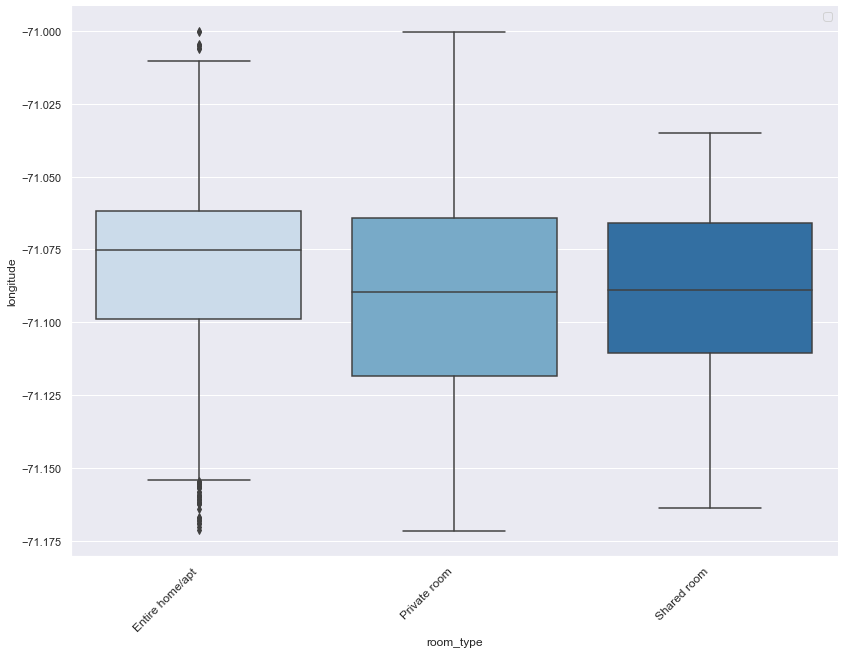

In [369]:
plt.figure(figsize=(70,30))
# plt.title("Count of Listings across neighbourhood by room type")

# sns.set(rc={'figure.figsize':(50,10)})

sns.catplot(x="room_type", y = 'longitude', kind="box", palette="Blues", data=cleaned_listing_df2, height=8.27, aspect=11.7/8.27)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.legend()
plt.show()

## checking if cleaning for outliers in Private Room listings would change the high importance seen for Private room type

In [ ]:
# checking if removing outliers from private room type changes/improves results

In [41]:
private_room_df = cleaned_listing_df2[cleaned_listing_df2['room_type'] == "Private room"] 

In [46]:
private_room_df.shape

(1352, 88)

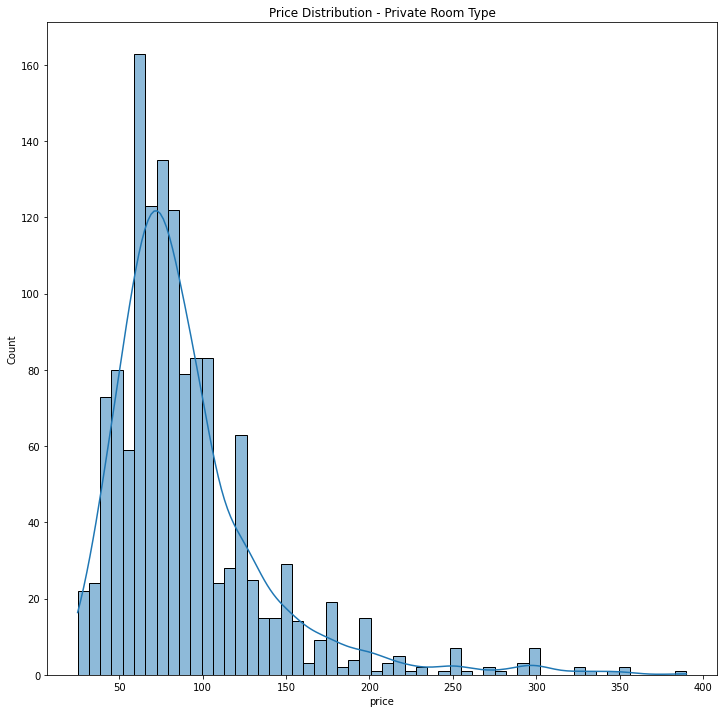

In [43]:
# PRIVATE ROOM vs PRICE DISTRIBUTION
plt.figure(figsize=(12,12))
plt.title("Price Distribution - Private Room Type")
sns.histplot(private_room_df.price, kde = True)
plt.show()

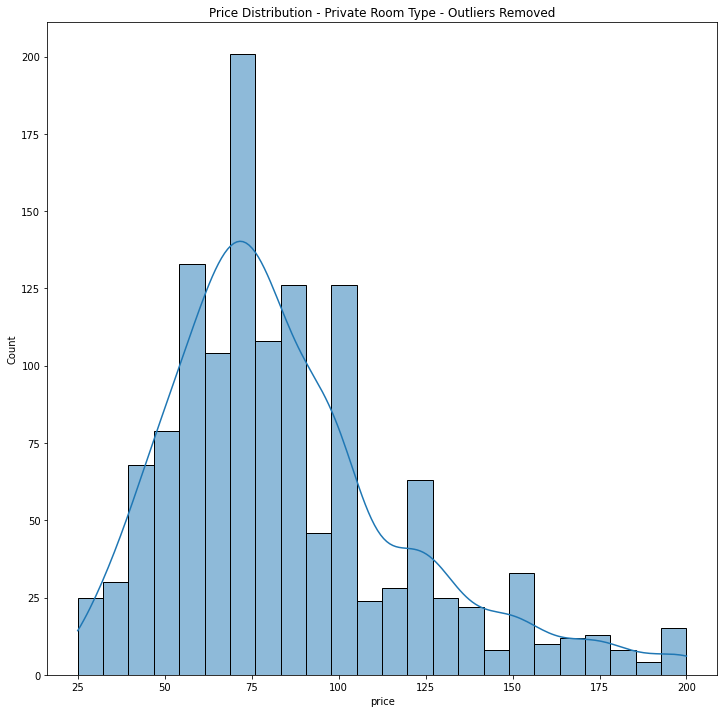

In [44]:
# PRICE
plt.figure(figsize=(12,12))
plt.title("Price Distribution - Private Room Type - Outliers Removed")
private_room_df2 = private_room_df[(private_room_df['price'] <= 200)]
sns.histplot(private_room_df2.price, kde = True)
plt.show()

In [47]:
private_room_df2.shape

(1311, 88)

### these are quite few in number but quite high! These are outliers so ofcourse wont be many so lets see the impact on the final results

In [58]:
cleaned_listing_df2.drop(cleaned_listing_df2[(cleaned_listing_df2['room_type'] == "Private room") & (cleaned_listing_df2['price'] > 200)].index, inplace = True)

C:\Users\anush\miniconda3\envs\ml\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
cleaned_listing_df2.shape

(3368, 88)

In [61]:
sel_col_df3 = cleaned_listing_df2[["price", "latitude","longitude", "accommodates", "bedrooms", "bathrooms", "beds", "security_deposit", "cleaning_fee", "guests_included", "availability_30", "availability_60", "availability_90", "availability_365", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_location", "review_scores_value", "calculated_host_listings_count", "host_response_time", "room_type", "bed_type", "neighbourhood_cleansed", "cancellation_policy", "property_type", "host_identity_verified", "host_has_profile_pic", "require_guest_profile_picture", "require_guest_phone_verification", "instant_bookable", "host_is_superhost"]]

In [62]:
cat_cols3 = sel_col_df3.select_dtypes(include = ['object']).columns

In [63]:
sel_col_dummy_df3 = create_dummy_df(sel_col_df3, cat_cols = cat_cols3, dummy_na = False)

In [65]:
sel_col_df3.shape

(3368, 32)

In [64]:
sel_col_dummy_df3.shape

(3368, 74)

No handles with labels found to put in legend.


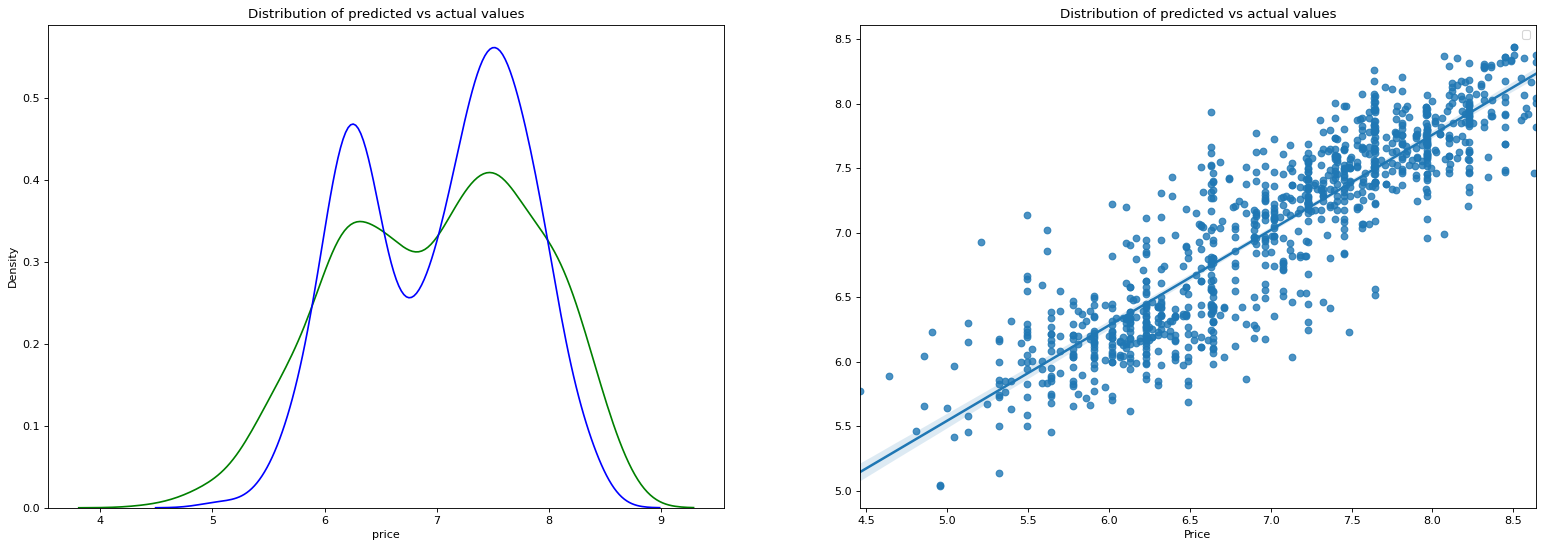

R sqaure of RandomForestRegressor(n_estimators=250, random_state=42): 0.7781189735679453


In [66]:
# lets test with r2 first
X = sel_col_dummy_df3.drop('price',  axis = 1 )
y = np.log2(sel_col_dummy_df3['price'].astype(int))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

def fit_predict_evaluate_model_r2(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    r2 = r2_score(y_test, prediction)
    
    fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
    axs[0].set_title('Distribution of predicted vs actual values')
    ax1 = sns.kdeplot(data=y_test, color="g", label='Actual values', ax=axs[0])
    ax2 = sns.kdeplot(data=prediction, color="b", label='Predicted values', ax=ax1)
    
    sns.regplot(x=y_test, y=prediction)
    plt.title('Distribution of predicted vs actual values')
    plt.xlabel('Price')
    plt.legend()
    plt.show()
    plt.close()
    
    print("R sqaure of {0}: {1}".format(model, r2))
    

    
# Create instance of Random Forest Regressor and evaluate model
model_rf = RandomForestRegressor(n_estimators=250, random_state=42)    
fit_predict_evaluate_model_r2(model_rf, X_train, y_train, X_test, y_test)
    
    


### And the score improved!!

In [67]:
f_importances = model_rf.feature_importances_

f_names = X_train.columns

f_std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)

zipped = zip(f_importances, f_names, f_std)
zipped_sorted = sorted(zipped, key = lambda x: x[0], reverse =  True)

n_features = 15
imps = [x[0] for x in zipped_sorted[:n_features]]
labels = [x[1] for x in zipped_sorted[:n_features]]
errors = [x[2] for x in zipped_sorted[:n_features]]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

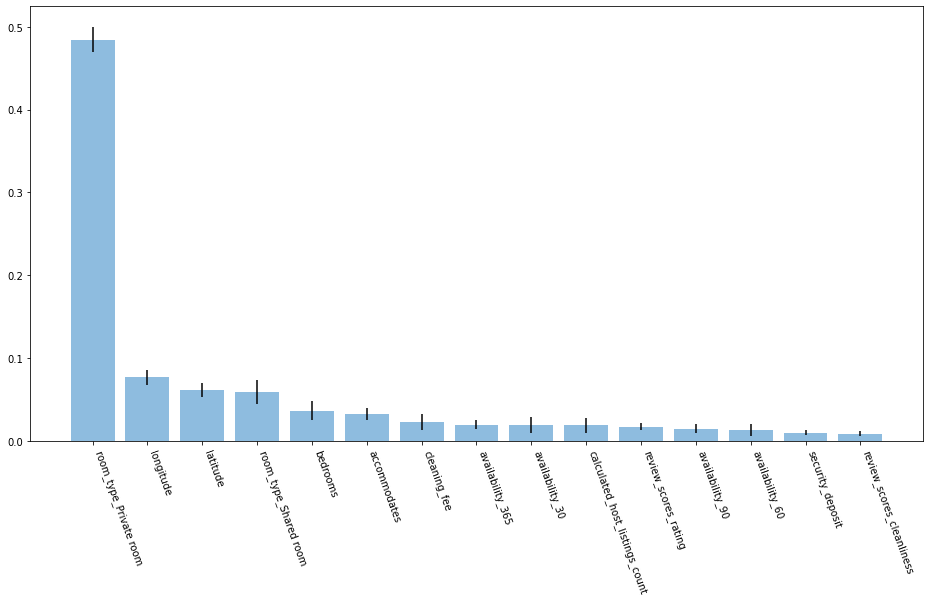

In [89]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.bar(range(n_features), imps, color = "#8ebcdf", yerr = errors)
plt.xticks(range(n_features), labels)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-70, ha="left")

### Though the top 15 features including the most important one as per the model still remain the same, there is some shift in the importance of the other features which is quite interesting to see!!

### It would be interesting to group neighbourhoods together based on Location (latitude, longitude) and understanding the vibe of the neighbourhoods through that - NLP


### Also interesting would be to use the review and calendar datasets to find trends, extract sentiments through reviews, and change in sentiments if any? has that led to changes in prices over time? - CAUSALITY